# Web Scrapping of JustWatch

In [1]:
#Import necessary libraries
from bs4 import BeautifulSoup
import requests

In [2]:
#Make a request to a website

movie_url = 'https://www.justwatch.com/in/movies?release_year_from=2000'

In [3]:
response = requests.get(movie_url, headers={'User-Agent': "Mozilla/5.0"})

In [4]:
#Parse the HTML content of the webpage

movie_soup = BeautifulSoup(response.content , 'lxml')

In [5]:
# Find all div elements with class 'title-list-grid__item' which represent movie items in the webpage

grid = movie_soup.find_all('div', class_='title-list-grid__item')

In [6]:
movies_url = []

# Iterate over elements in 'grid' and construct movie URLs
for ele in grid:
    
    # Extract the URL for each movie from the anchor tag's 'href' attribute
    m_url = 'https://www.justwatch.com' + ele.find('a')['href']
    
    # Append the constructed movie URL to the movies_url list
    movies_url.append(m_url)

In [7]:
movies = []

for url in movies_url[:51]: # The reason for employing slicing here is to address the issue of receiving a <Response [403]> error when utilizing the full-length URL.
    try:
        # Iterate over the list of movie URLs
        resp = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})
        
        # Parse the HTML content of the movie webpage
        soup1 = BeautifulSoup(resp.content, 'lxml')
        
        # Extract movie information
        
        # Title
        try:
            title = soup1.find('h1').text.split('(')[0].strip()
        except:
            title = None
        # Year
        try:
            year = soup1.find('span', class_='text-muted').text.strip("( )")
        except:
            year = None
        
        # Genre
        try:
            Genre = soup1.find('h3', class_='detail-infos__subheading', string='Genres').find_next_sibling('div', class_='detail-infos__value').text.strip().split(',')
        except:
            Genre = None
        
        # IMDB rating
        try:
            imdb_rating = soup1.find_all('div', class_='jw-scoring-listing__rating')[1].text.split('(')[0].strip()
        except:
            imdb_rating = None
        
        # Runtime
        try:
            runtime = soup1.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            runtime = None
        
        # Age rating
        try:
            age_rating = soup1.find('h3', class_='detail-infos__subheading', string='Age rating').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            age_rating = None
        
        # Production country
        try:
            country = soup1.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            country = None
        
        # Stream service
        try:    
            stream_tag = soup1.find('div', class_='buybox-row stream').find_all('img')
            stream_service = [img['alt'] for img in stream_tag]
    
        except:
            stream_service = None
        
        # Create a dictionary containing movie information
        movies_info ={
            'Title' : title,
            'Release_year' : year,
            'Genre' : Genre,
            'imdb_rating' : imdb_rating,
            'Runtime' : runtime,
            'Age_rating' : age_rating,
            'Production_Country' : country,
            'Stream_Service' : stream_service,
            'URL' : url,
            'Type' : 'Movie'
            
        }
        
        # Append the movie information dictionary to the list of movies
        movies.append(movies_info)
    except Exception as e:
        
        
        #Print error message if an exception occurs
         print(f"Error processing {url}: {e}")
       

In [30]:
# Import the libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Create a pandas DataFrame from the list of movie information dictionaries

data_movie = pd.DataFrame(movies)

In [10]:
# Display the first 10 rows of the 'data_movie' DataFrame

data_movie.head(10)

,Title,Release_year,Genre,imdb_rating,Runtime,Age_rating,Production_Country,Stream_Service,URL,Type
0,Hanu-Man,2024,"[Comedy, Science-Fiction, Fantasy, Action &...",8.2,2h 39min,UA,India,"[Jio Cinema, Zee5]",https://www.justwatch.com/in/movie/hanu-man,Movie
1,Oppenheimer,2023,"[Drama, History]",8.3,3h 0min,UA,"United States, United Kingdom",[Jio Cinema],https://www.justwatch.com/in/movie/oppenheimer,Movie
2,Dune,2021,"[Science-Fiction, Action & Adventure, Drama]",8.0,2h 35min,UA,United States,[Netflix],https://www.justwatch.com/in/movie/dune-2021,Movie
3,Poor Things,2023,"[Comedy, Science-Fiction, Romance, Drama]",8.0,2h 22min,A,"Ireland, United Kingdom, United States",[Hotstar],https://www.justwatch.com/in/movie/poor-things,Movie
4,Animal,2023,"[Action & Adventure, Crime, Drama, Mystery ...",6.2,3h 21min,A,India,[Netflix],https://www.justwatch.com/in/movie/animal-2022,Movie
5,12th Fail,2023,[Drama],9.0,2h 27min,None,India,[Hotstar],https://www.justwatch.com/in/movie/12th-fail,Movie
6,Fighter,2024,"[Mystery & Thriller, War & Military, Drama, ...",6.7,2h 47min,UA,India,[Netflix],https://www.justwatch.com/in/movie/fighter-2022,Movie
7,Salaar,2023,"[Crime, Drama, Mystery & Thriller, Action &...",6.5,2h 55min,A,India,"[Netflix, Hotstar]",https://www.justwatch.com/in/movie/salaar,Movie
8,Eagle,2024,"[Mystery & Thriller, Action & Adventure]",6.5,2h 39min,UA,India,[Amazon Prime Video],https://www.justwatch.com/in/movie/eagle-2024,Movie
9,Anyone But You,2023,"[Romance, Comedy]",6.2,1h 43min,None,"Australia, United States",None,https://www.justwatch.com/in/movie/anyone-but-you,Movie


In [11]:
# Display Information about Movie DataFrame
data_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               51 non-null     object
 1   Release_year        51 non-null     object
 2   Genre               51 non-null     object
 3   imdb_rating         51 non-null     object
 4   Runtime             51 non-null     object
 5   Age_rating          27 non-null     object
 6   Production_Country  51 non-null     object
 7   Stream_Service      37 non-null     object
 8   URL                 51 non-null     object
 9   Type                51 non-null     object
dtypes: object(10)
memory usage: 4.1+ KB


In [12]:
#Make a request to a website

tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

In [13]:
response_tv = requests.get(tv_url)

In [14]:
#Parse the HTML content of the webpage

soup_tv = BeautifulSoup(response_tv.text, 'lxml')

In [15]:
# Find all div elements with class 'title-list-grid__item' which represent movie items in the webpage

grid_tv = soup_tv.find_all('div', class_='title-list-grid__item')

In [16]:
shows_url = []

# Iterate over elements in 'grid_tv' and construct movie URLs
for ele in grid_tv:
    
    # Extract the URL for each show from the anchor tag's 'href' attribute
    t_url = 'https://www.justwatch.com' + ele.find('a')['href']
    
    # Append the constructed show URL to the shows_url list
    shows_url.append(t_url)
    

In [17]:
shows = []
for url in shows_url[:51]: # The reason for employing slicing here is to address the issue of receiving a <Response [403]> error when utilizing the full-length URL.
    try:
        # Iterate over the list of show URLs
        resp = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})
        
        # Parse the HTML content of the show webpage
        soup1 = BeautifulSoup(resp.content, 'lxml')
        
        # Extract show information.
        
        # Title
        try:
            title = soup1.find('h1').text.split('(')[0].strip()
        except:
            title = None
        # Year
        try:
            year = soup1.find('span', class_='text-muted').text.strip("( )")
        except:
            year = None
        
        # Genre
        try:
            Genre = soup1.find('h3', class_='detail-infos__subheading', string='Genres').find_next_sibling('div', class_='detail-infos__value').text.strip().split(', ')
        except:
            Genre = None
        
        # IMDB Rating
        try:
            imdb_rating = soup1.find_all('div', class_='jw-scoring-listing__rating')[1].text.split('(')[0].strip()
        except:
            imdb_rating = None
        
        # Runtime
        try:
            runtime = soup1.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            runtime = None
        
        # Age Rating
        try:
            age_rating = soup1.find('h3', class_='detail-infos__subheading', string='Age rating').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            age_rating = None
        
        # Production Country
        try:
            country = soup1.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
        except:
            country = None
        
        #Stream Service
        try:    
            stream_tag = soup1.find('div', class_='buybox-row stream').find_all('img')
            stream_service = [img['alt'] for img in stream_tag]
    
        except:
            stream_service = None
        
        # Create a dictionary containing Show information
        shows_info ={
            'Title' : title,
            'Release_year' : year,
            'Genre' : Genre,
            'imdb_rating' : imdb_rating,
            'Runtime' : runtime,
            'Age_rating' : age_rating,
            'Production_Country' : country,
            'Stream_Service' : stream_service,
            'URL' : url,
            'Type' : 'Show'
            
        }
        
        # Append the show information dictionary to the list of shows
        shows.append(shows_info)
    except Exception as e:
        
        #Print error message if an exception occurs
         print(f"Error processing {url}: {e}")

In [18]:
# Create a pandas DataFrame from the list of Show information dictionaries

data_show = pd.DataFrame(shows)

In [19]:
# Display the first 10 rows of the 'data_show' DataFrame

data_show.head(10)

,Title,Release_year,Genre,imdb_rating,Runtime,Age_rating,Production_Country,Stream_Service,URL,Type
0,Shōgun,2024,"[War & Military, Drama, History]",9.1,58min,None,United States,[Hotstar],https://www.justwatch.com/in/tv-show/shogun-2024,Show
1,Mirzapur,2018,"[Crime, Action & Adventure, Drama, Mystery ...",8.5,50min,None,India,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/mirzapur,Show
2,Panchayat,2020,"[Comedy, Drama]",8.9,33min,None,India,[Amazon Prime Video],https://www.justwatch.com/in/tv-show/panchayat,Show
3,Sunflower,2021,"[Comedy, Crime]",7.5,37min,A,India,[VI movies and tv],https://www.justwatch.com/in/tv-show/sunflower...,Show
4,Game of Thrones,2011,"[Drama, Fantasy, Action & Adventure, Scienc...",9.2,59min,A,"United States, United Kingdom",[Jio Cinema],https://www.justwatch.com/in/tv-show/game-of-t...,Show
5,Maharani,2021,[Drama],7.9,44min,UA,India,"[Sony Liv, VI movies and tv]",https://www.justwatch.com/in/tv-show/maharani-...,Show
6,Avatar: The Last Airbender,2024,"[Science-Fiction, Action & Adventure, Comedy...",7.3,54min,None,United States,[Netflix],https://www.justwatch.com/in/tv-show/avatar-th...,Show
7,Maamla Legal Hai,2024,"[Drama, Comedy]",8.2,32min,None,India,[Netflix],https://www.justwatch.com/in/tv-show/maamla-le...,Show
8,The Gentlemen,2024,"[Comedy, Crime, Action & Adventure, Drama]",8.3,50min,A,"United States, United Kingdom",[Netflix],https://www.justwatch.com/in/tv-show/the-gentl...,Show
9,Solo Leveling,2024,"[Animation, Action & Adventure, Fantasy, Sc...",8.5,24min,None,"South Korea, Japan",[Crunchyroll],https://www.justwatch.com/in/tv-show/solo-leve...,Show


In [20]:
# Display information about Show DataFrame.

data_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               51 non-null     object
 1   Release_year        51 non-null     object
 2   Genre               51 non-null     object
 3   imdb_rating         51 non-null     object
 4   Runtime             51 non-null     object
 5   Age_rating          19 non-null     object
 6   Production_Country  51 non-null     object
 7   Stream_Service      48 non-null     object
 8   URL                 51 non-null     object
 9   Type                51 non-null     object
dtypes: object(10)
memory usage: 4.1+ KB


# Data Filtering and Analysis

In [23]:
# Merging data to make a final DataFrame.

final_data = pd.concat([data_show, data_movie], ignore_index = True)

In [24]:
# Looking at the last 10 rows of DataFrame.

final_data.tail(10)

,Title,Release_year,Genre,imdb_rating,Runtime,Age_rating,Production_Country,Stream_Service,URL,Type
92,Junior,2023,[Action & Adventure],7.4,2h 2min,None,India,[Amazon Prime Video],https://www.justwatch.com/in/movie/junior-2023,Movie
93,Code 8 Part II,2024,"[Crime, Science-Fiction, Action & Adventure,...",5.7,1h 41min,None,"Canada, United States",[Netflix],https://www.justwatch.com/in/movie/code-8-part-ii,Movie
94,Vadakkupatti Ramasamy,2024,"[Comedy, Drama, Fantasy, Science-Fiction]",6.4,2h 24min,U,India,"[Amazon Prime Video, aha]",https://www.justwatch.com/in/movie/vadakkupatt...,Movie
95,Ayalaan,2024,"[Science-Fiction, Action & Adventure]",6.0,2h 35min,None,India,[Sun Nxt],https://www.justwatch.com/in/movie/ayalaan,Movie
96,Abraham Ozler,2024,"[Crime, Drama, Mystery & Thriller]",6.8,2h 23min,None,India,[Hotstar],https://www.justwatch.com/in/movie/abraham-ozler,Movie
97,Harry Potter and the Philosopher's Stone,2001,"[Action & Adventure, Fantasy, Kids & Family]",7.6,2h 32min,U,"United States, United Kingdom",[Jio Cinema],https://www.justwatch.com/in/movie/harry-potte...,Movie
98,Godzilla Minus One,2023,"[Science-Fiction, Horror, Action & Adventure...",8.3,2h 5min,None,Japan,None,https://www.justwatch.com/in/movie/godzilla-mi...,Movie
99,Blue Star,2024,"[Comedy, Drama, Sport]",7.0,2h 46min,None,India,[Amazon Prime Video],https://www.justwatch.com/in/movie/blue-star,Movie
100,Malaikottai Vaaliban,2024,"[Action & Adventure, Fantasy, Mystery & Thri...",6.4,2h 34min,UA,India,[Hotstar],https://www.justwatch.com/in/movie/malaikottai...,Movie
101,Barbie,2023,"[Comedy, Action & Adventure, Fantasy]",6.9,1h 54min,UA,"United Kingdom, United States",[Jio Cinema],https://www.justwatch.com/in/movie/barbie-2023,Movie


In [25]:
# Changing DataType of imdb_rating from object to float.

final_data['imdb_rating'] = final_data['imdb_rating'].astype(float)

In [26]:
# Display information about the final_data DataFrame

final_data.info()  # This line prints a summary of the DataFrame's structure and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               102 non-null    object 
 1   Release_year        102 non-null    object 
 2   Genre               102 non-null    object 
 3   imdb_rating         102 non-null    float64
 4   Runtime             102 non-null    object 
 5   Age_rating          46 non-null     object 
 6   Production_Country  102 non-null    object 
 7   Stream_Service      85 non-null     object 
 8   URL                 102 non-null    object 
 9   Type                102 non-null    object 
dtypes: float64(1), object(9)
memory usage: 8.1+ KB


In [27]:
# Custom Function for changing runtime from string to TimeDate datatype.
# Import necessary libraries
from datetime import time, timedelta  # Importing time and timedelta from datetime module
def convert_to_time(time_str):
    hours = 0
    minutes = 0
    # Check if the input is null
    if pd.isnull(time_str):
        # Return NaT (Not a Time) for null values
        return pd.NaT
    
    else:

        if 'h' in time_str:
            hours_str, minutes_str = time_str.split('h')
            hours = int(hours_str.strip())
            minutes = int(minutes_str.replace('min', '').strip())
        else:
            minutes = int(time_str.replace('min', '').strip())
        
         #Return time object with extracted hours and minutes
        return time(hours, minutes)

In [28]:
# Apply the custom conversion function to the 'Runtime' column of the DataFrame
final_data['Runtime'] = final_data['Runtime'].apply(convert_to_time)

In [289]:
# Generate descriptive statistics for only numeric columns in the DataFrame final_data

final_data.describe()

,imdb_rating,Runtime_minutes
count,102.000000,102.000000
mean,7.527451,91.764706
std,1.158623,52.244508
min,3.300000,19.000000
25%,6.800000,46.000000
50%,7.750000,79.500000
75%,8.300000,142.000000
max,9.500000,201.000000


Based on the descriptive statistics provided for the columns "imdb_rating" and "Runtime_minutes" in the DataFrame:

**IMDb Rating:** The average IMDb rating for the movies in the dataset is approximately 7.53. The ratings range from a minimum of 3.3 to a maximum of 9.5, indicating a diverse range of reception among the movies. The standard deviation of approximately 1.16 suggests some variability in the ratings, although the majority of ratings likely cluster around the mean.

**Runtime:** The average runtime of the movies is approximately 91.76 minutes. The runtimes vary widely, ranging from a minimum of 19 minutes to a maximum of 201 minutes. The standard deviation of approximately 52.24 indicates a significant spread in the lengths of the movies, with some being relatively short and others considerably longer.

**Conclusion:** Overall, the dataset consists of a diverse collection of movies with varying IMDb ratings and runtimes. While the IMDb ratings provide insight into the perceived quality of the movies, the runtime information offers an understanding of the length distribution within the dataset. This analysis can help inform decisions related to movie selection, understanding audience preferences, and identifying potential trends in movie characteristics.

# Analysis on Runtime(Movie and Show)

### Average Runtime for Movie

In [36]:
# Calculate total seconds of only movies runtime
only_movie_runtime = final_data['Runtime'][final_data['Runtime'].notnull() & (final_data['Type'] == 'Movie')]

total_seconds = sum(t.hour * 3600 + t.minute * 60 for t in only_movie_runtime)
 
# Calculate mean seconds
mean_seconds = total_seconds / len(only_movie_runtime)

# Convert mean seconds to a timedelta object
mean_time = timedelta(seconds=mean_seconds)

# Convert timedelta to time object
mean_time = time(hour=mean_time.seconds // 3600, minute=(mean_time.seconds % 3600) // 60)

# Print the mean time
print("Mean time:", mean_time)

Mean time: 02:20:00


**The average runtime of movies in the dataset was found to be approximately 2 hours and 20 minutes. This suggests that movies tend to have a duration that falls within a moderate range, possibly reflecting common preferences among audiences.**

### Movie runtime Visualization

In [33]:
final_data['Runtime_minutes'] = final_data['Runtime'].apply(lambda x: x.hour*60 + x.minute)

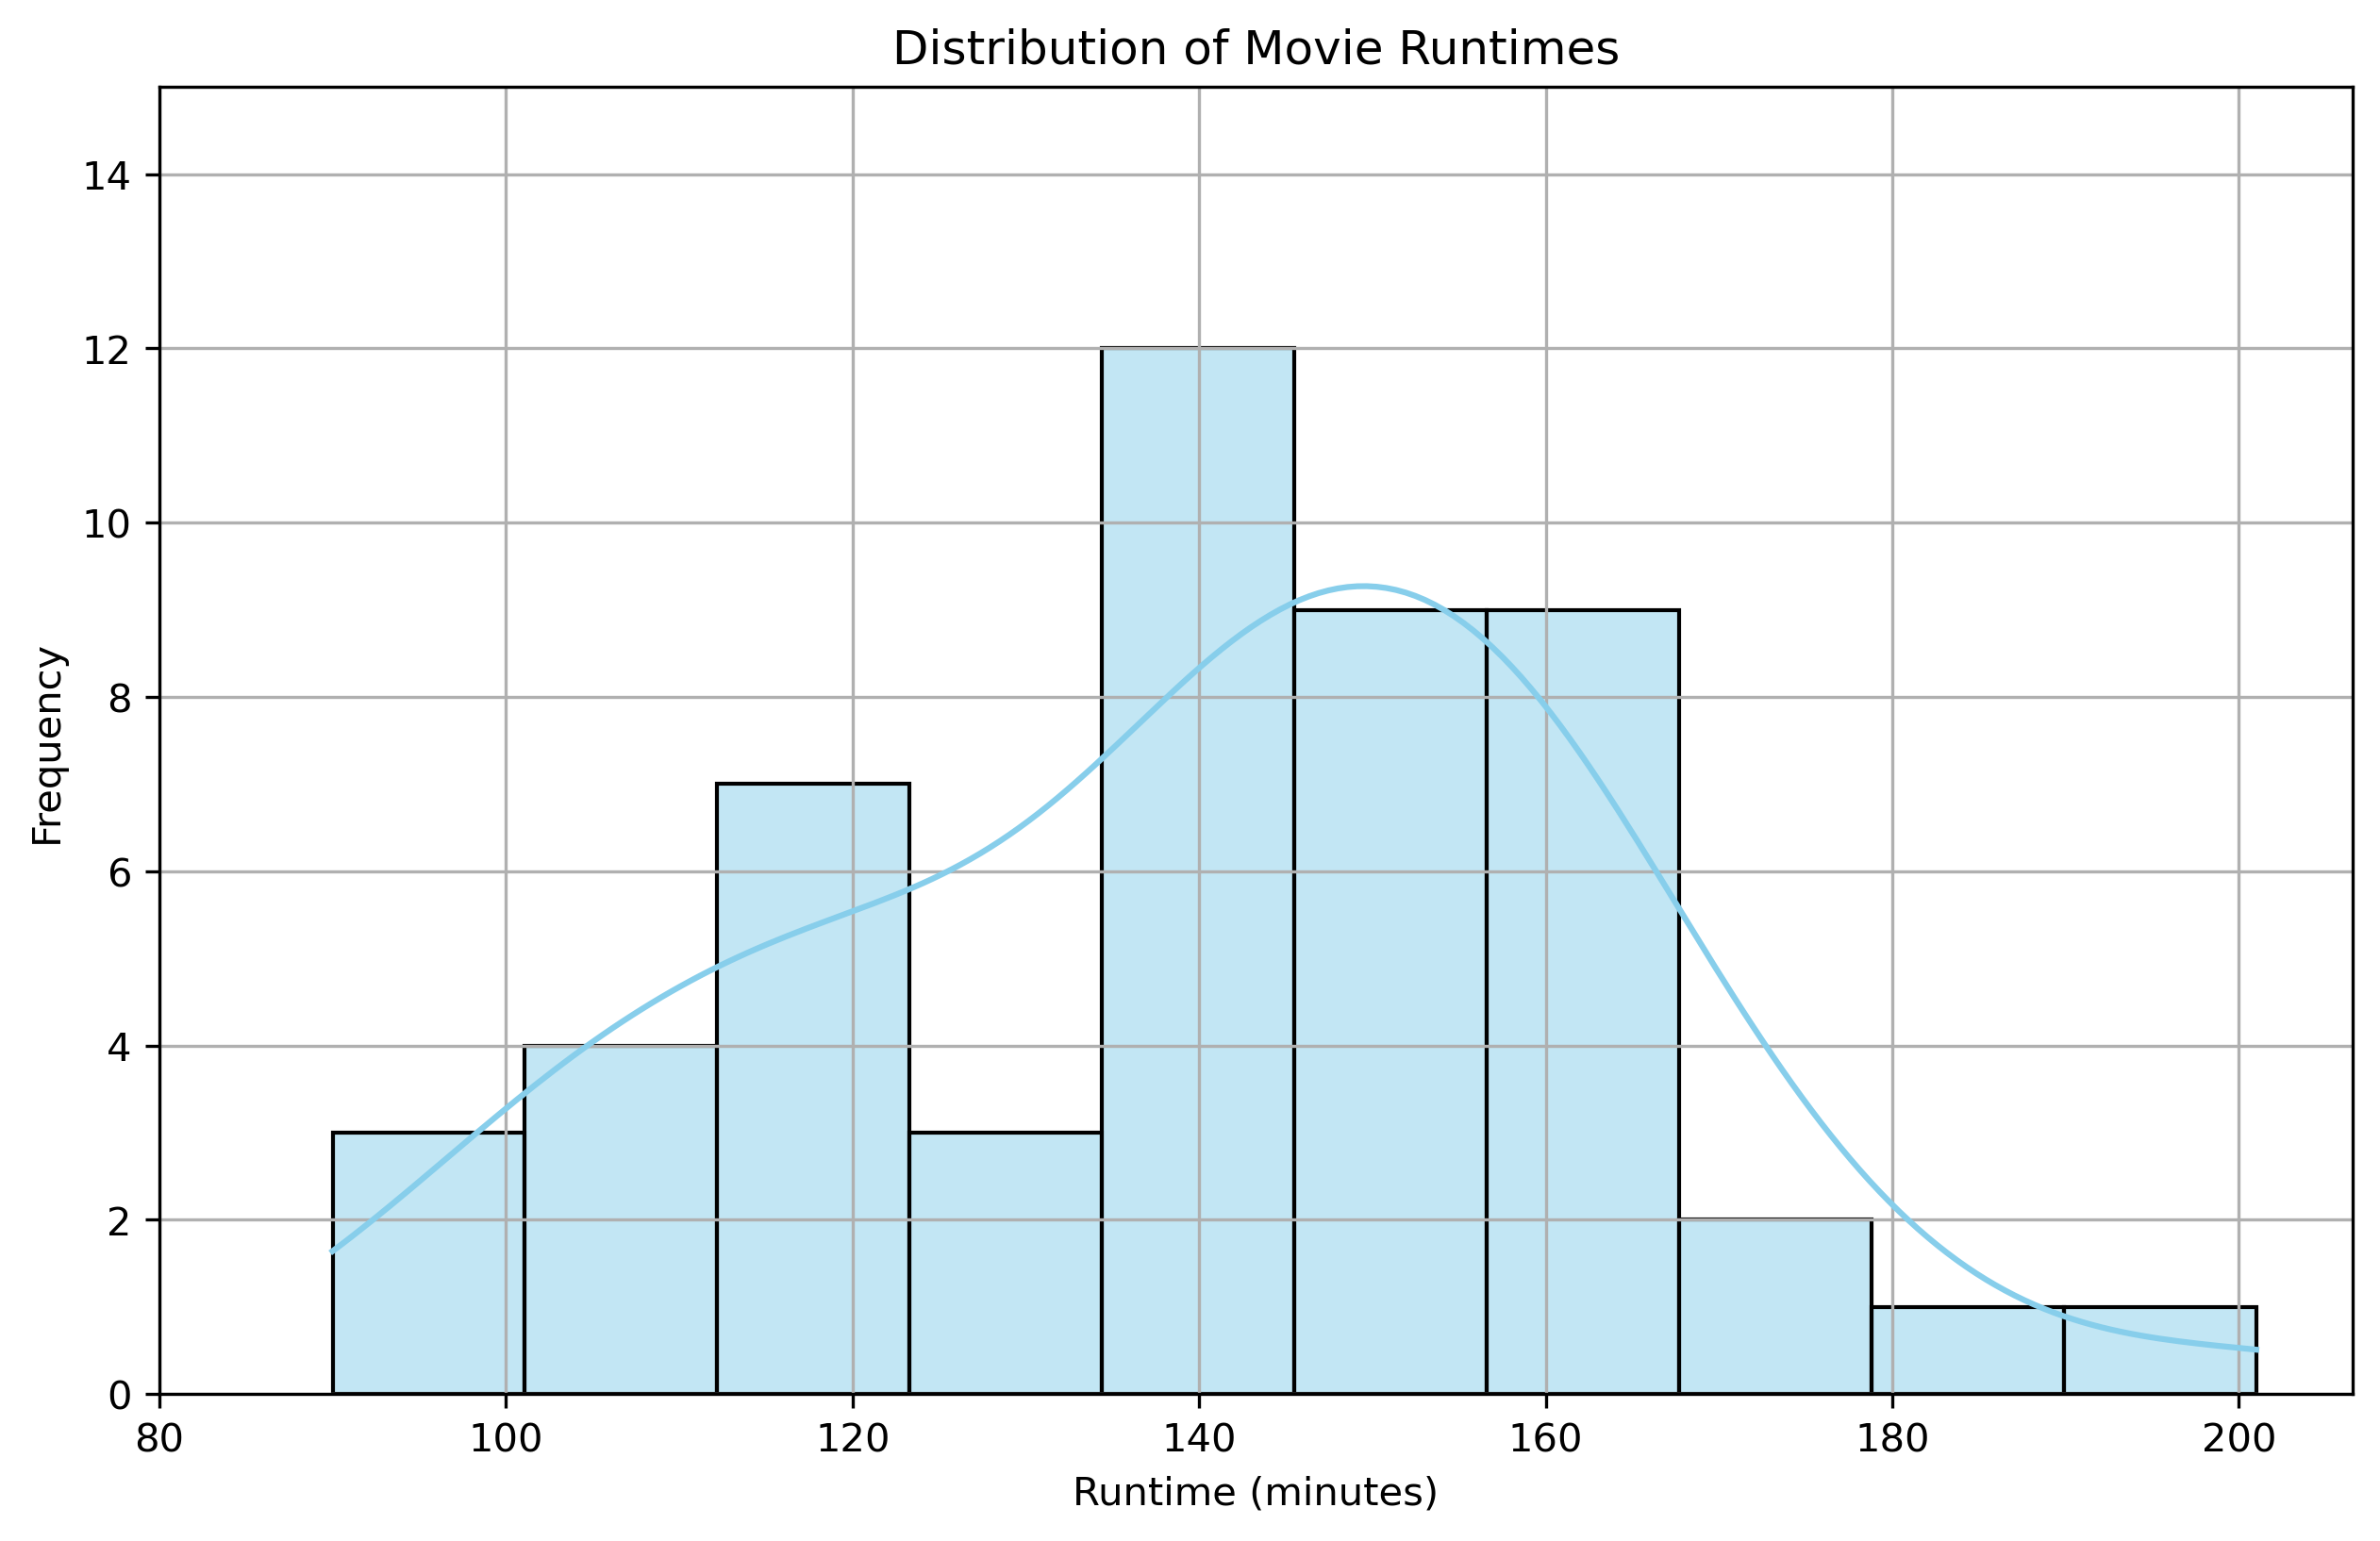

In [53]:
# Set the figure size and DPI
plt.figure(figsize=(10, 6), dpi=300)

# Create a histogram to visualize the distribution of movie runtimes
# Filtering data for movies only, using final_data['Type']=='Movie']
# Set kde=True for kernel density estimation to add a smooth line representing the distribution
sns.histplot(final_data['Runtime_minutes'][final_data['Type']=='Movie'], kde=True, bins=10, color='skyblue', edgecolor='black')

# Set title for the plot
plt.title('Distribution of Movie Runtimes')

# Set labels for x and y axes
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')

# Set limits for y-axis from 0 to 15 for better visualization
plt.ylim(0,15)
plt.xlim(80)

# Add gridlines for better readability
plt.grid(True)

# Display the plot
plt.show()

**The histogram shows that most movies fall between 120 and 160 minutes long. 
There are also a fair number of movies that are shorter than 120 minutes or longer than 160 minutes, but not nearly as many. This suggests that the distribution of movie runtimes is skewed to the right.
The Peak of KDE show the mean which is around 140 to 160 minutes.**

## Average Runtime for Shows per Episode

In [48]:
# Calculate total seconds of only shows runtime
only_show_runtime = final_data['Runtime'][final_data['Runtime'].notnull() & (final_data['Type'] == 'Show')]

total_seconds = sum(t.hour * 3600 + t.minute * 60 for t in only_show_runtime)
 
# Calculate mean seconds
mean_seconds = total_seconds / len(only_show_runtime)

# Convert mean seconds to a timedelta object
mean_time = timedelta(seconds=mean_seconds)

# Convert timedelta to time object
mean_time = time(hour=mean_time.seconds // 3600, minute=(mean_time.seconds % 3600) // 60)

# Print the mean time
print("Mean time:", mean_time)

Mean time: 00:43:00


**The average runtime of shows per episode in the dataset was found to be approximately 43 minutes. This indicates that shows tend to have a standard duration, aligning with audience preferences for a typical viewing experience.**

### Show runtime Visual

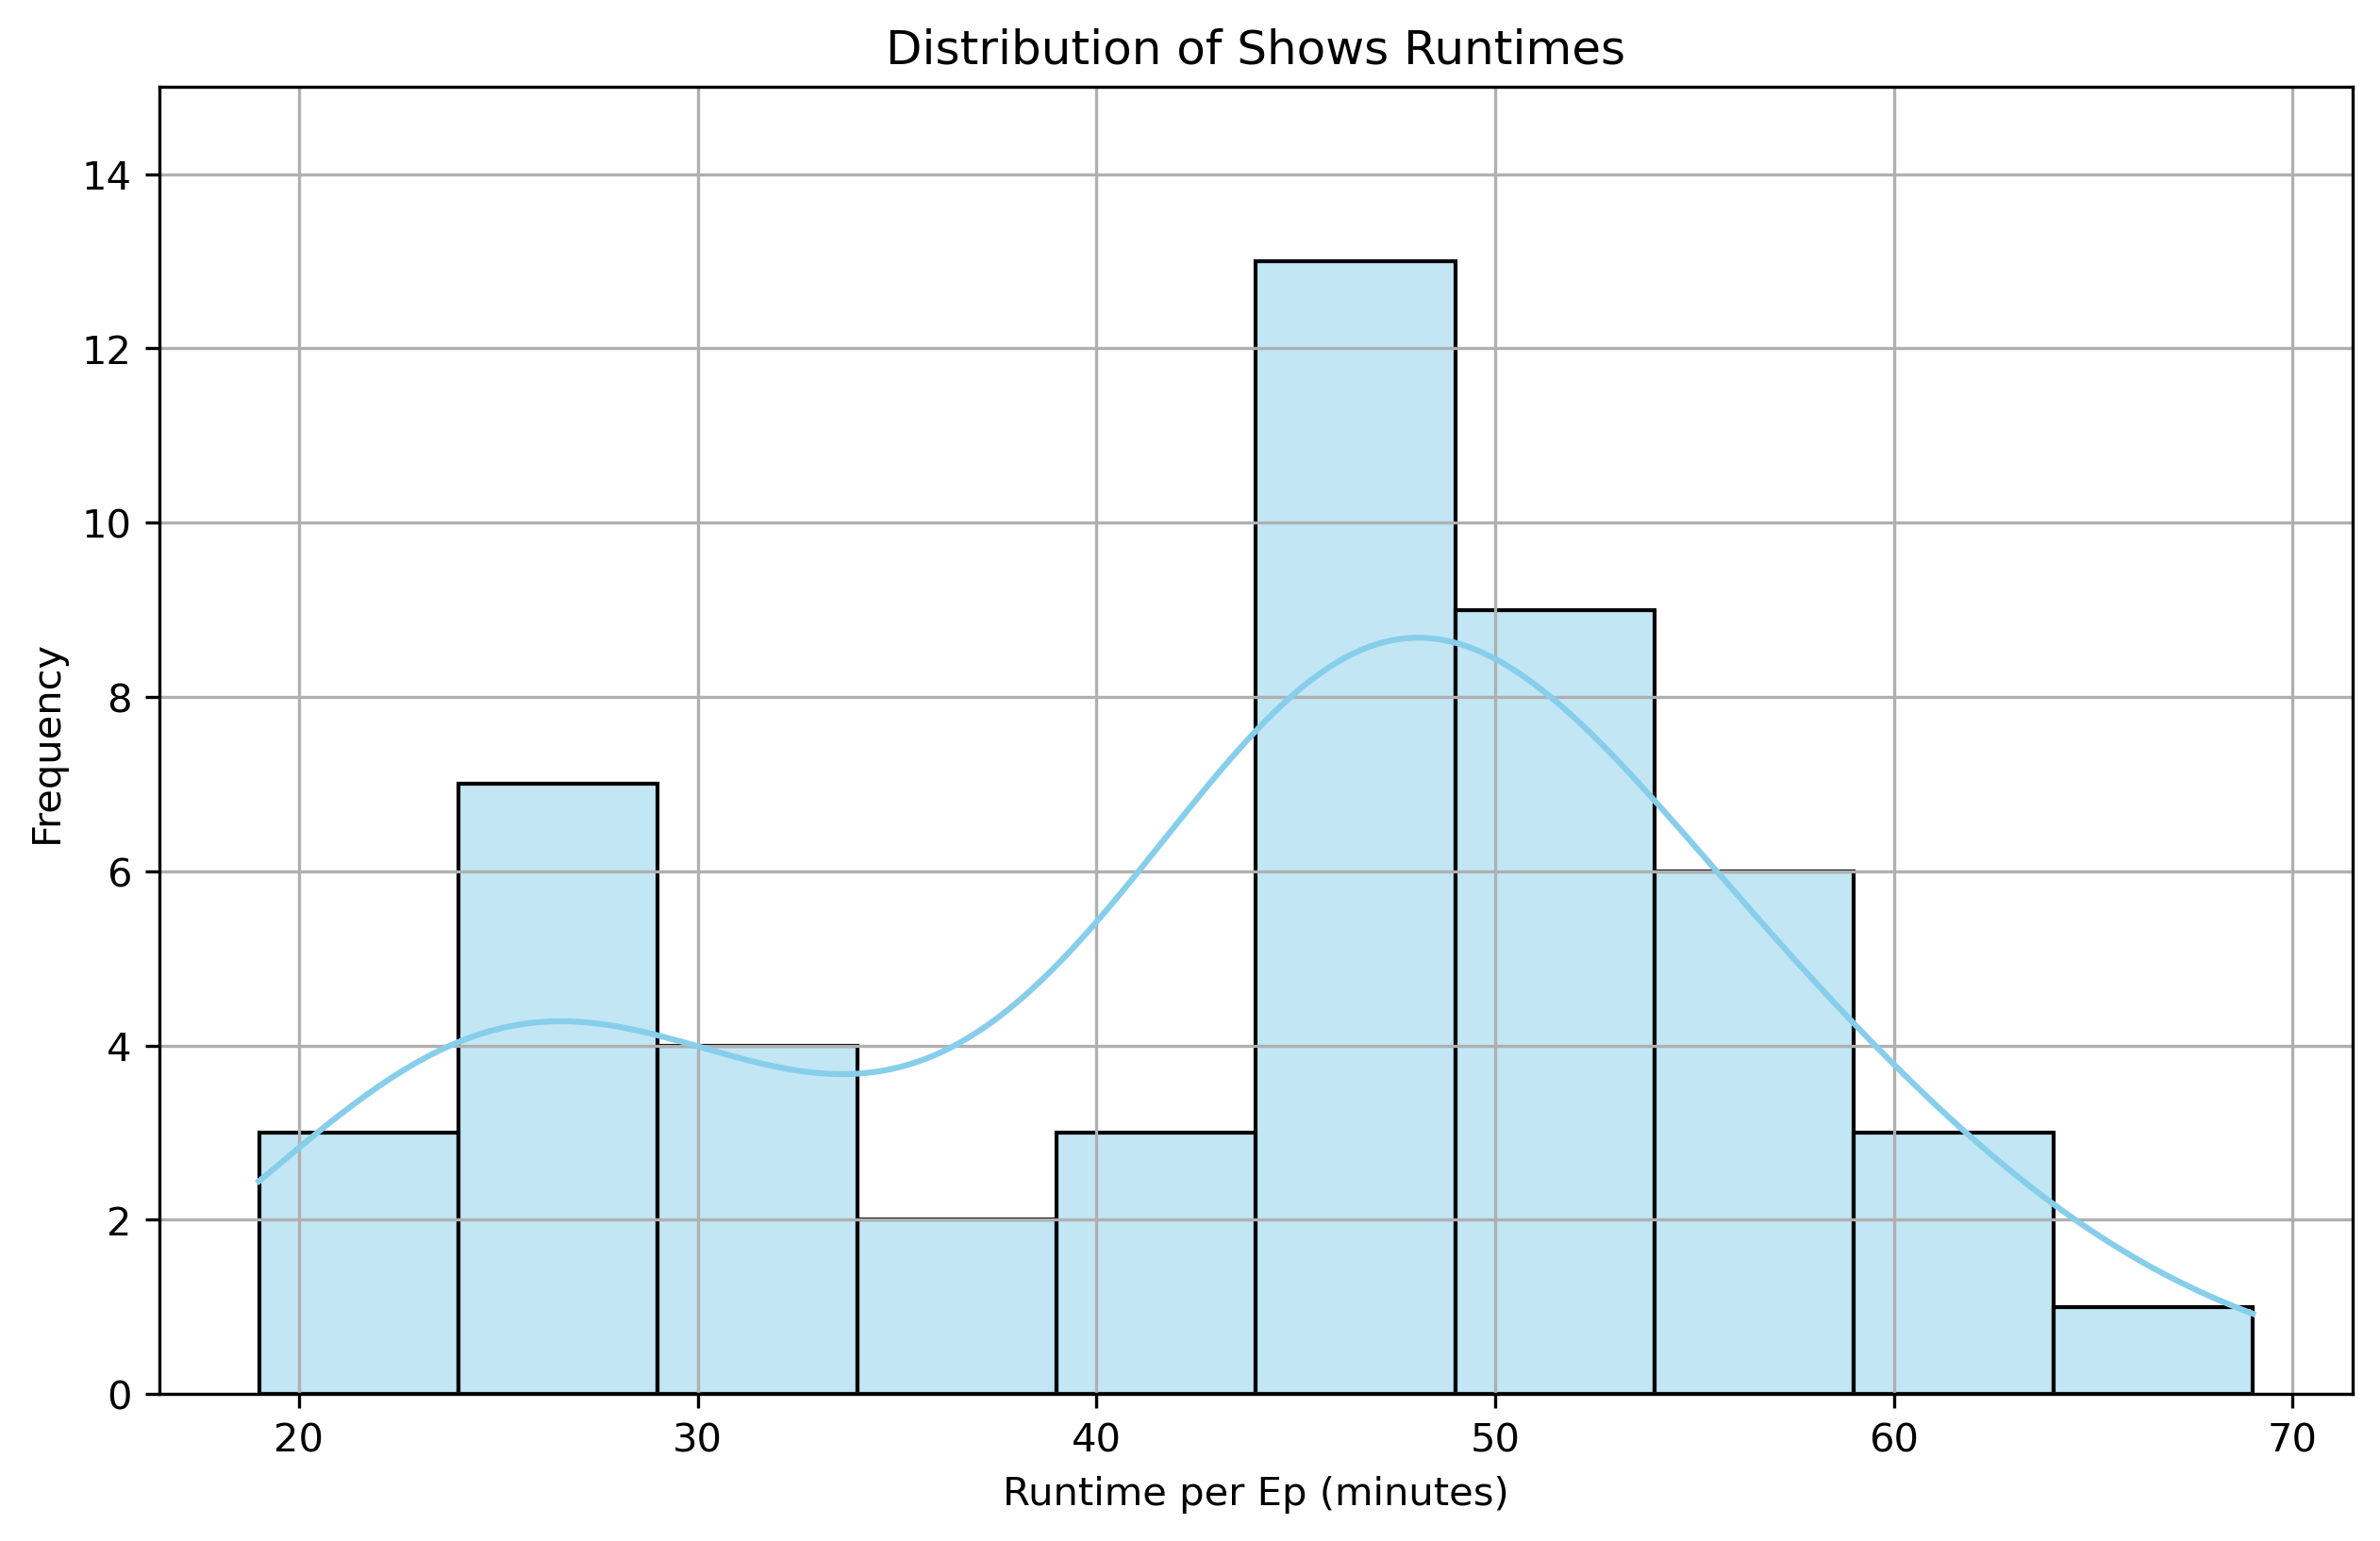

In [56]:
# Set the figure size and DPI
plt.figure(figsize=(10, 6), dpi=300)

# Create a histogram to visualize the distribution of movie runtimes
# Filtering data for movies only, using final_data['Type']=='Show']
# Set kde=True for kernel density estimation to add a smooth line representing the distribution
sns.histplot(final_data['Runtime_minutes'][final_data['Type']=='Show'], kde=True, bins=10, color='skyblue', edgecolor='black')

# Set title for the plot
plt.title('Distribution of Shows Runtimes')

# Set labels for x and y axes
plt.xlabel('Runtime per Ep (minutes)')
plt.ylabel('Frequency')

# Set limits for y-axis from 0 to 15 for better visualization
plt.ylim(0,15)

# Add gridlines for better readability
plt.grid(True)

# Display the plot
plt.show()

**The histogram shows that most runtime per episodes of show fall between 40 and 60 minutes long. 
There are also a fair number of movies that are shorter than 45 minutes or longer than 55 minutes, but not nearly as many. This suggests that the distribution of movie runtimes is skewed to the right.
The Peak of KDE show the mean which is around 40 to 50 minutes.**

## MEAN IMDB RATING FOR MOVIE AND SHOW

In [60]:
# Grouping the 'final_data' DataFrame by the 'Type' column and calculating the mean of the 'imdb_rating' column for each group.
mean_rating = final_data.groupby('Type')['imdb_rating'].mean()

# Printing the mean ratings for each 'Type'.
print(mean_rating)

Type
Movie    7.092157
Show     7.962745
Name: imdb_rating, dtype: float64


**The analysis reveals that on average, shows tend to have a slightly higher IMDb rating (7.96) compared to movies (7.09). This suggests that viewers generally perceive shows more favorably than movies, as indicated by their IMDb ratings.**

## Analyzing Top Genres

In [188]:
# Extract individual genres, strip whitespace, and count occurrences to find top genres.
value_count_genre = final_data['Genre'].explode().str.strip().value_counts()

#Printing Top Genres.
print(value_count_genre)

Genre
Drama                 73
Action & Adventure    48
Mystery & Thriller    42
Comedy                29
Crime                 28
Science-Fiction       26
Fantasy               23
Romance               10
Animation              8
War & Military         7
Kids & Family          7
History                6
Horror                 5
Documentary            2
Western                2
Made in Europe         2
Sport                  2
Name: count, dtype: int64


In [189]:
# Resetting index to convert the Series into a DataFrame with 'Genre' and 'count' columns
df = pd.DataFrame(value_count_genre).reset_index()

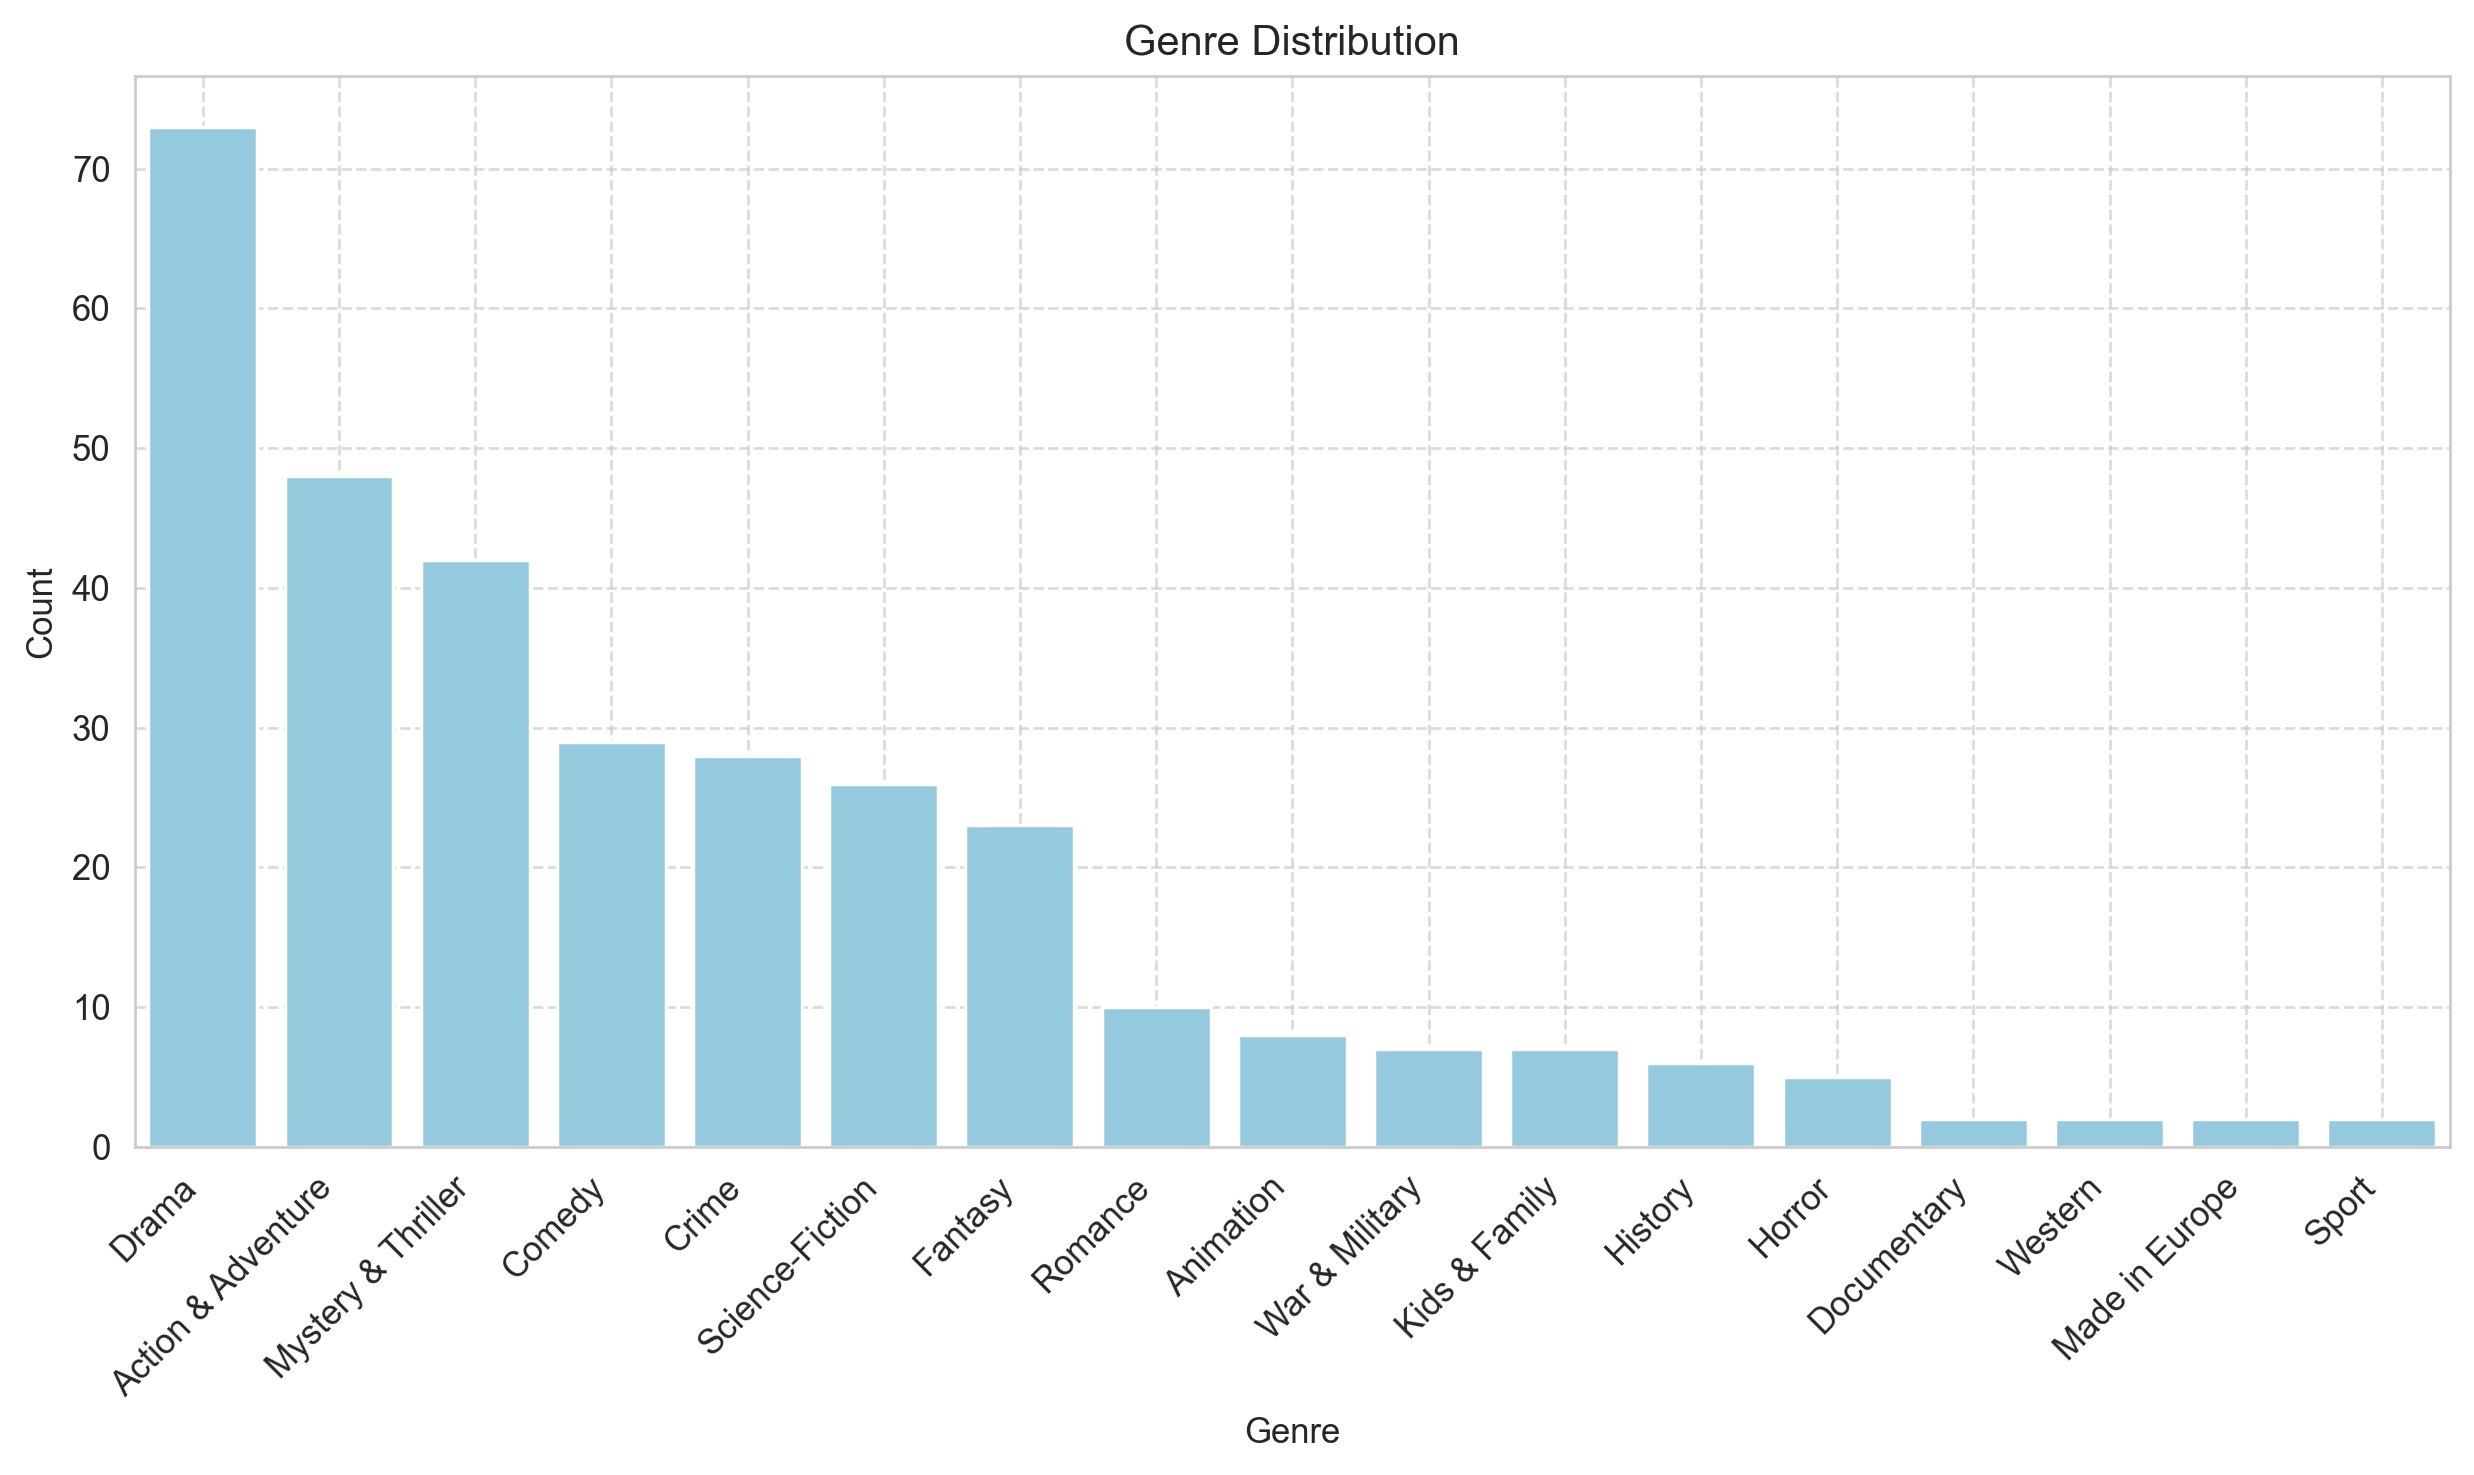

In [190]:
# Create bar plot
plt.figure(figsize=(10, 6), dpi=250)

# Set the style
sns.set_style("whitegrid")

# Plot the barplot
sns.barplot(x=df['Genre'], y=df['count'], color='skyblue')

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')

# Add grid lines only on the y-axis
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()

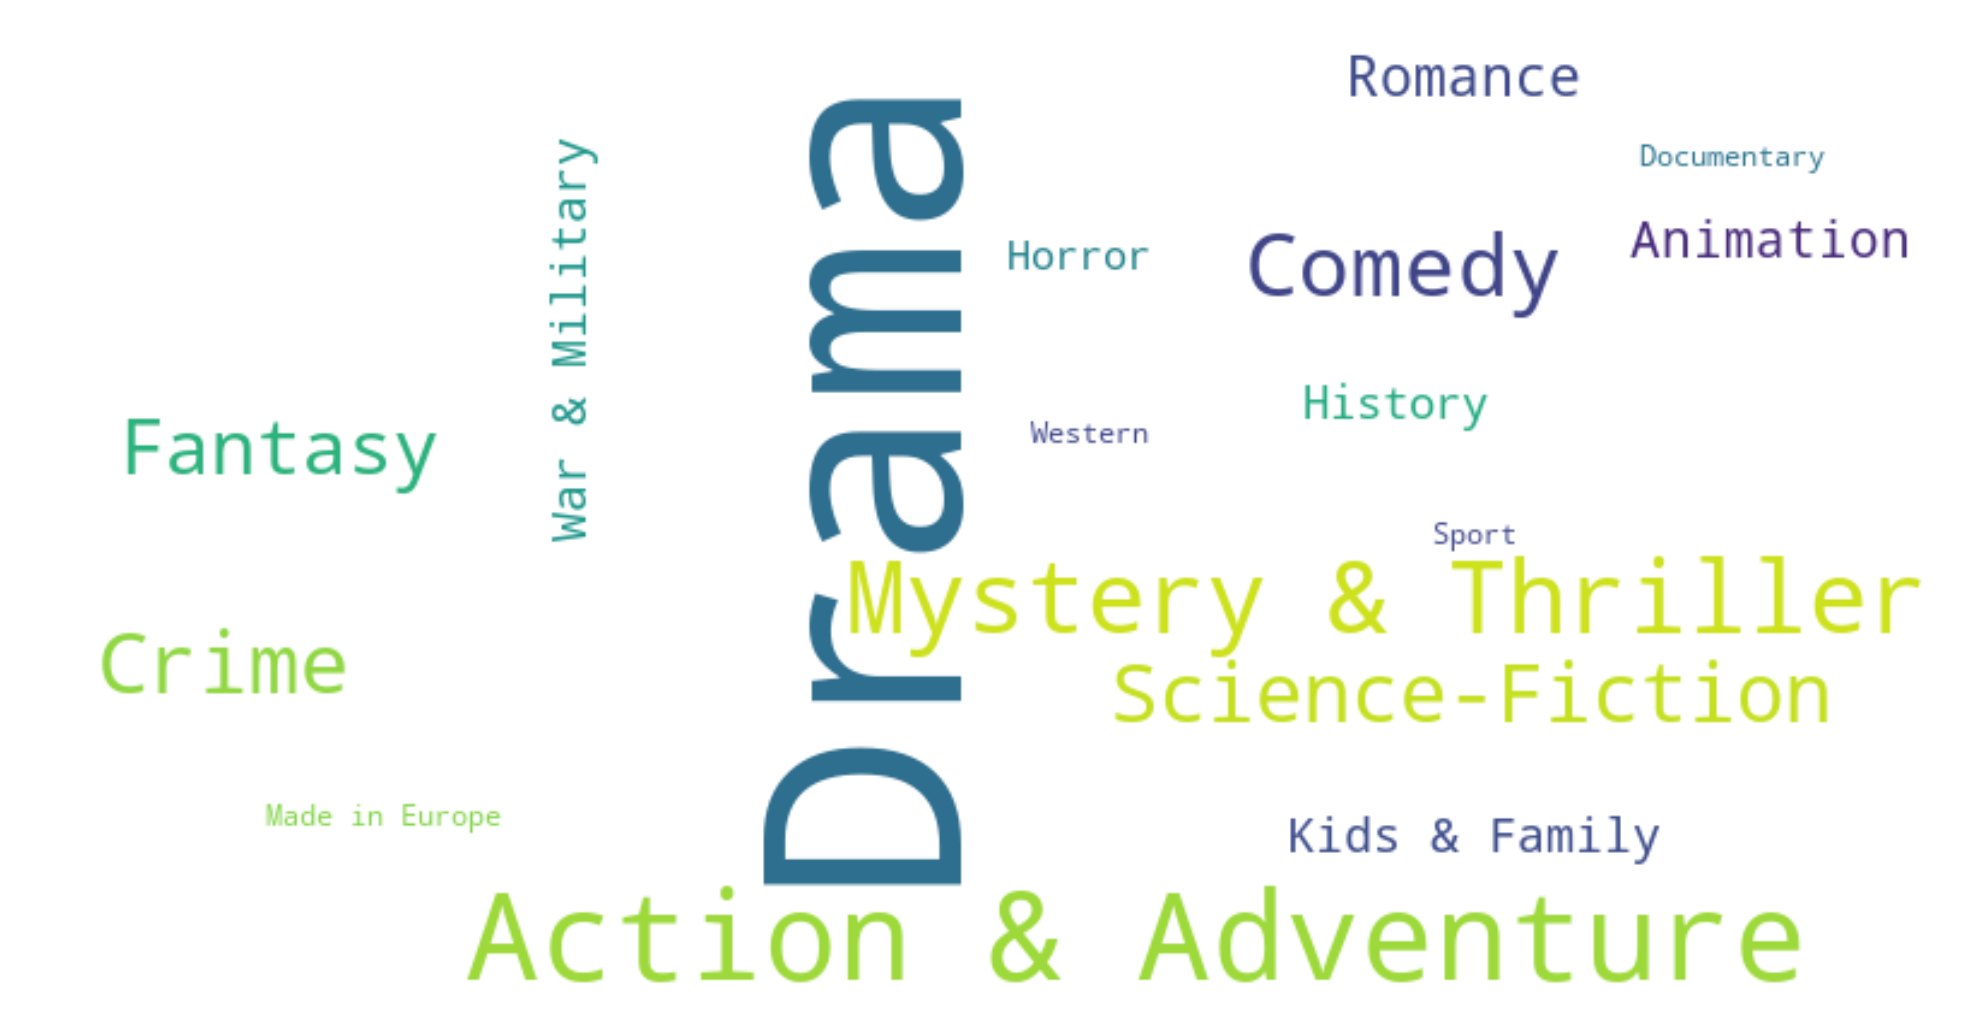

In [191]:
#Importing Relevent Library.
from wordcloud import WordCloud

# Generate word cloud from genre frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(value_count_genre)

# Display the word cloud
plt.figure(figsize=(10, 5), dpi=250)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Based on the genre distribution in the dataset, several observations can be made:**

**Drama Dominance:** Drama emerges as the most prevalent genre with 73 occurrences, indicating its popularity or perhaps its frequent inclusion across various types of content.

**Action & Adventure and Mystery & Thriller:** These genres follow closely behind Drama, suggesting a strong interest in thrilling and adventurous narratives among the audience.

**Comedy and Crime:** Comedy and Crime genres are also fairly represented, albeit with fewer occurrences compared to Drama, Action & Adventure, and Mystery & Thriller.

**Genre Diversity:** The dataset encompasses a diverse range of genres, including Science-Fiction, Fantasy, Romance, Animation, War & Military, Kids & Family, History, Horror, Documentary, Western, Made in Europe, and Sport, albeit with varying frequencies.

**Less Prevalent Genres:** Some genres such as Documentary, Western, Made in Europe, and Sport have notably lower occurrences, suggesting they might be niche interests or less commonly produced content.

**Insight into Audience Preferences:** These genre counts can provide valuable insights into audience preferences, which can inform content creation, marketing strategies, and platform recommendations.

## Average Mean Rating For Genres

In [206]:
# Drop rows with missing values in the 'Genre' column
genre = final_data.dropna(subset=['Genre'])

In [218]:
# Create a DataFrame for genres ratings
genre_rating_df = pd.DataFrame({
    # Extract individual streaming services from the 'Genre' column
    'Genres': [genre for genres in genre['Genre'] for genre in genres],
     # Repeat IMDb ratings for each Genre based on the number of occurrences
    'Rating': genre['imdb_rating'].repeat(genre['Genre'].apply(len))
})
genre_rating_df['Genres'] = genre_rating_df['Genres'].str.strip()

In [224]:
# Group by streaming service and calculate the mean rating
mean_rating_genre = genre_rating_df.groupby('Genres').mean().sort_values('Rating', ascending=False) # Sort the DataFrame based on mean rating in descending order

print(mean_rating_genre)

                      Rating
Genres                      
Animation           8.562500
Science-Fiction     7.803846
Fantasy             7.800000
Kids & Family       7.800000
Horror              7.720000
History             7.716667
Comedy              7.679310
Drama               7.643836
War & Military      7.557143
Western             7.550000
Action & Adventure  7.497917
Mystery & Thriller  7.419048
Crime               7.350000
Romance             7.210000
Documentary         7.150000
Sport               6.700000
Made in Europe      5.750000


In [234]:
df_genre_rating = pd.DataFrame(mean_rating_genre).reset_index()

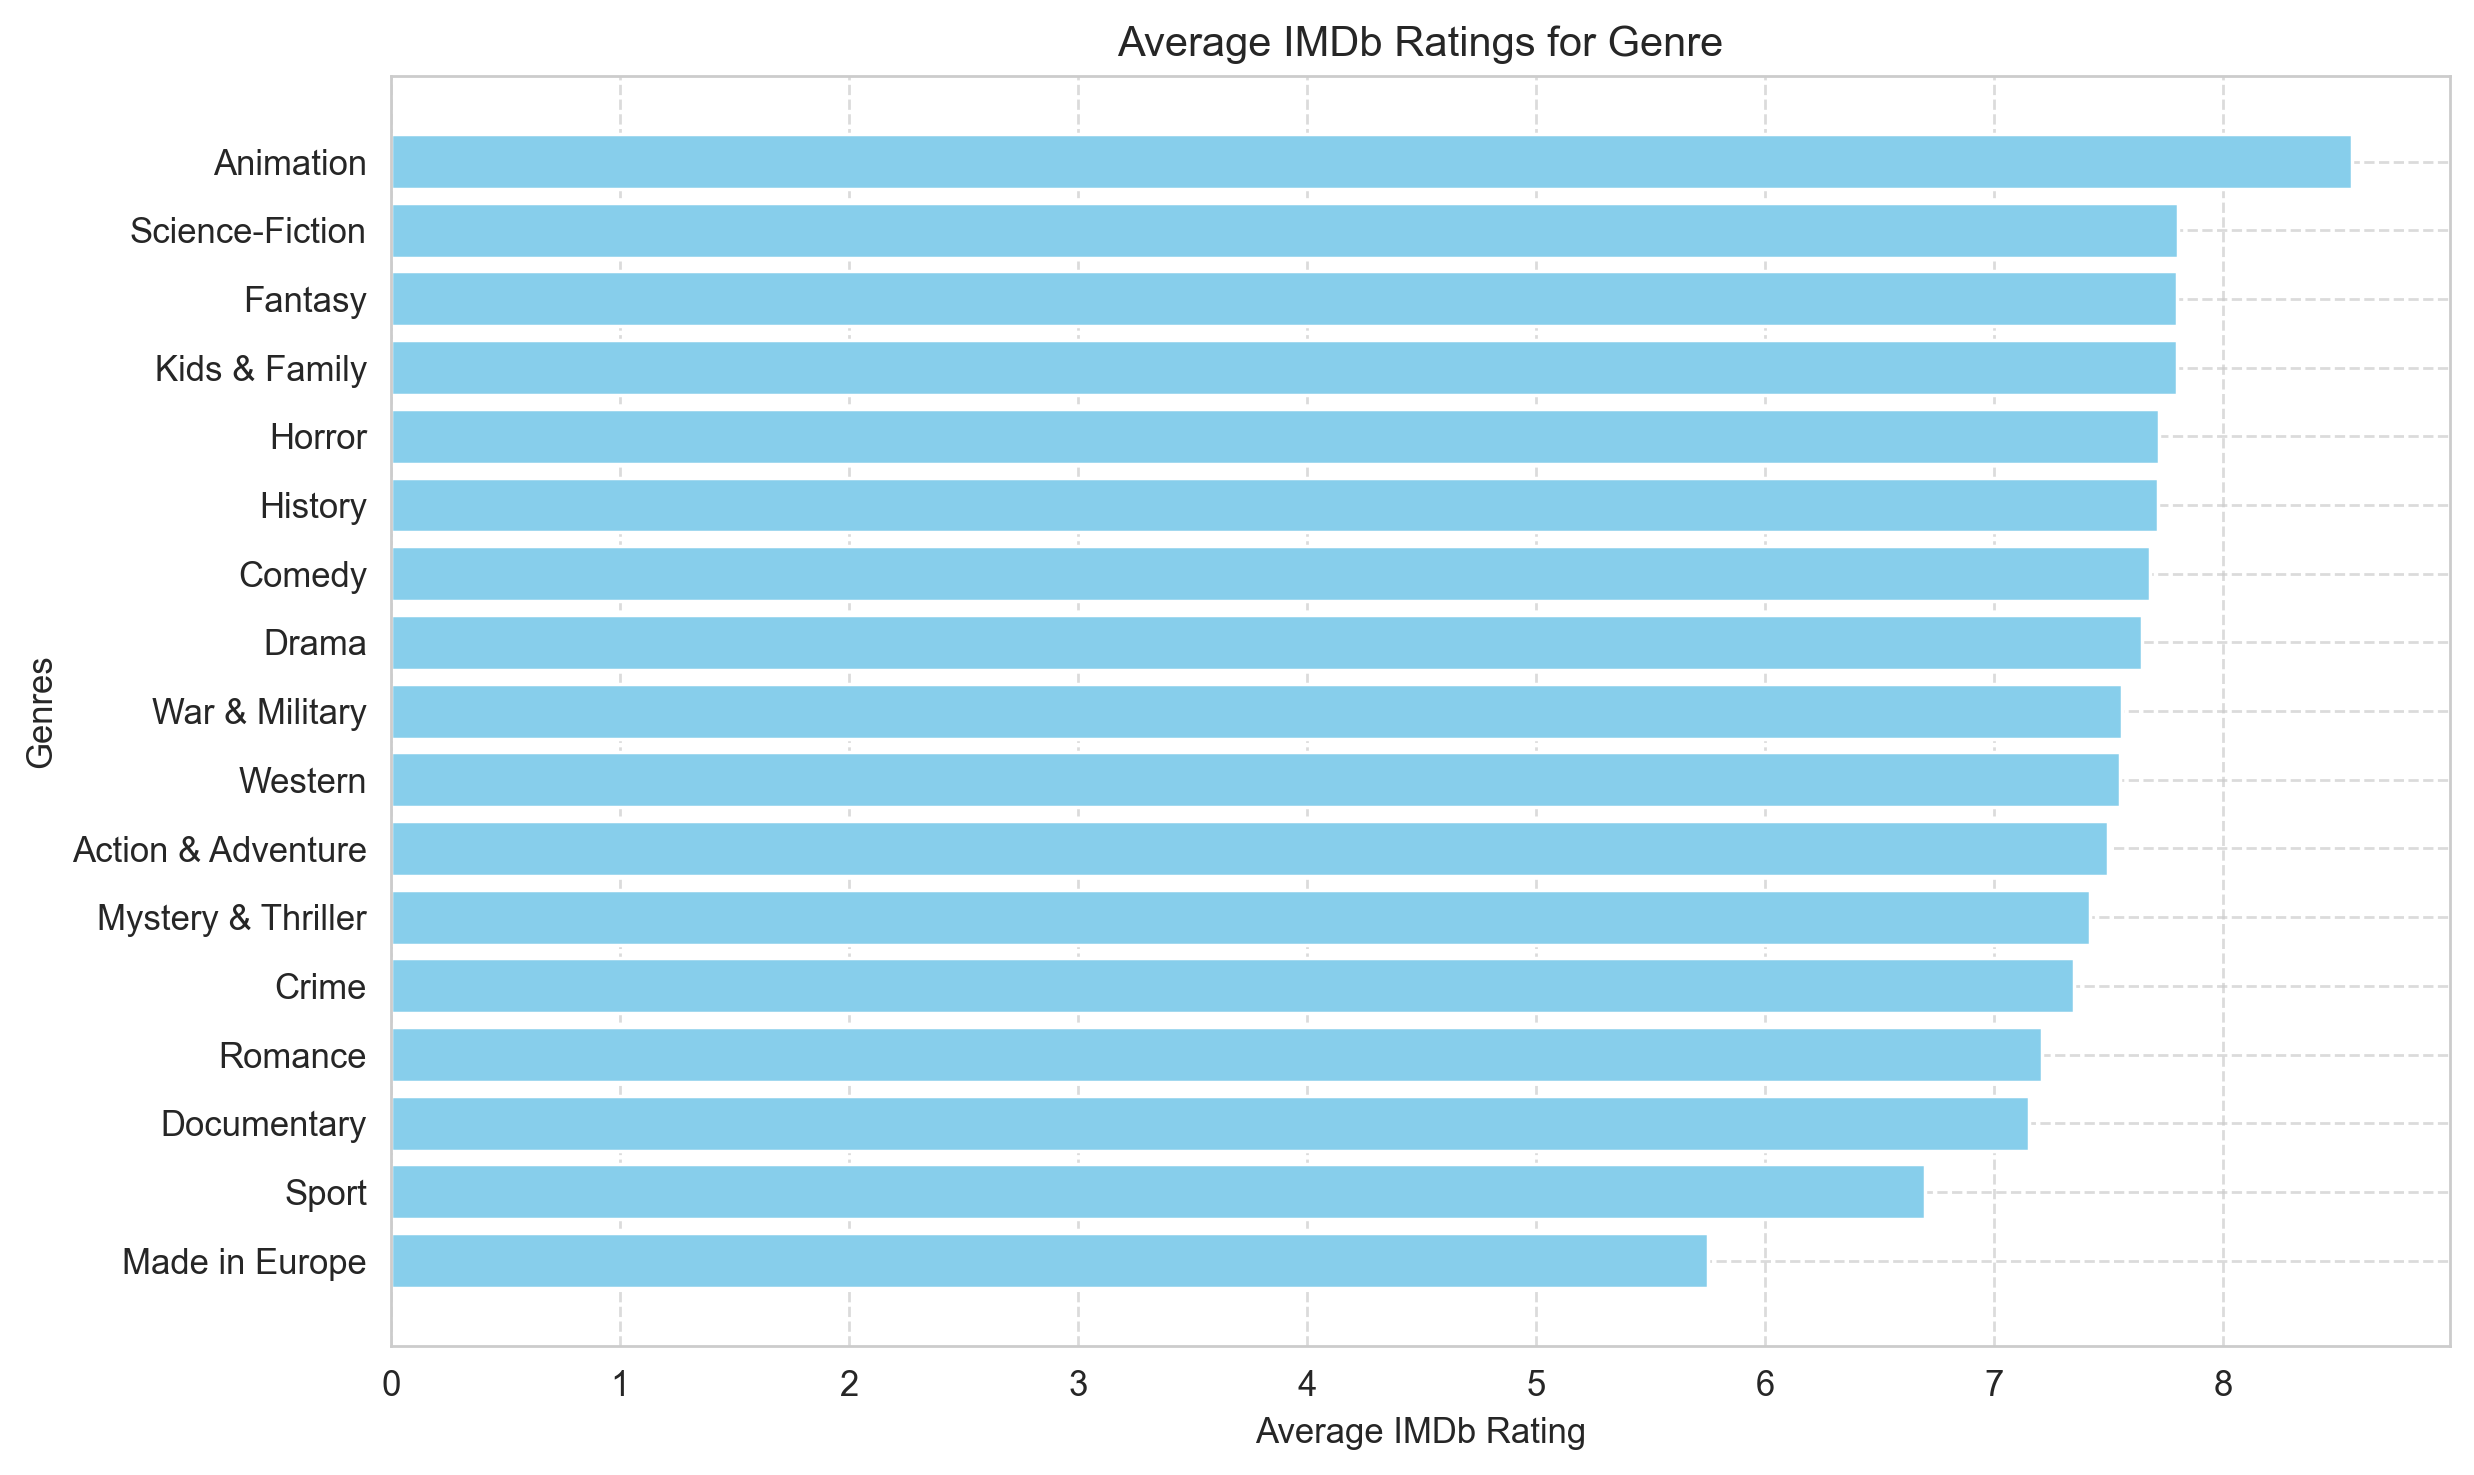

In [245]:
# Plot stream service and imdb rating.
plt.figure(figsize=(10, 6), dpi=250)

# Set the style
sns.set_style("whitegrid")

#plot horizontal bar plot
plt.barh('Genres', 'Rating', data = df_genre_rating, color='skyblue')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Genres')
plt.title('Average IMDb Ratings for Genre')

# Add grid lines only on the y-axis
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Invert y-axis to display highest rating at the top
plt.gca().invert_yaxis() 

# Adjust layout to prevent clipping of labels
plt.tight_layout()

plt.grid(True)
plt.show()

The output displays average ratings for various genres of movies or TV shows.

**Animation** has the highest average rating of **8.56**, indicating that audiences generally perceive animated content very positively.

**Science-Fiction, Fantasy, and Kids & Family** genres all have **relatively high average ratings**, suggesting that audiences enjoy imaginative and family-friendly content.

**Horror and History** genres also have **respectable average ratings** indicating that audiences appreciate both thrilling and educational content.

**Comedy and Drama genres have solid ratings**reflecting the enduring popularity of these genres across various audiences.

**War & Military and Western** genres have slightly lower ratings compared to others but still maintain **above-average scores.**

**Action & Adventure and Mystery & Thriller** genres have **moderate ratings**indicating they are generally well-received but not as universally acclaimed as some other genres.

Crime and Romance genres have lower average ratings compared to others, suggesting that these genres might have more polarized reception among viewers.

**Documentary and Sport genres** have relatively lower ratings compared to the rest, possibly indicating a narrower audience appeal or more specific viewer preferences.

**Overall, the ratings provide insight into audience preferences across different genres, highlighting which genres tend to resonate more positively with viewers on average. However, it's essential to note that individual preferences can vary widely, and the success of any particular movie or TV show depends on various factors beyond just genre.**

## FInding Predominant Stream Service

In [192]:
# Extract individual Stream Service, strip whitespace, and count occurrences to find top Stream Service.
value_stream_service = final_data['Stream_Service'].explode().str.strip().value_counts()

#Printing Top Stream Service.
print(value_stream_service)

Stream_Service
Netflix               32
Amazon Prime Video    23
Hotstar               12
Jio Cinema            10
Sony Liv               4
Crunchyroll            4
Zee5                   3
VI movies and tv       2
Alt Balaji             2
Sun Nxt                2
Apple TV Plus          1
Lionsgate Play         1
aha                    1
Name: count, dtype: int64


In [193]:
# Resetting index to convert the Series into a DataFrame with 'Stream_Service' and 'count' columns
df_stream = pd.DataFrame(value_stream_service).reset_index()
df_stream

,Stream_Service,count
0,Netflix,32
1,Amazon Prime Video,23
2,Hotstar,12
3,Jio Cinema,10
4,Sony Liv,4
5,Crunchyroll,4
6,Zee5,3
7,VI movies and tv,2
8,Alt Balaji,2
9,Sun Nxt,2


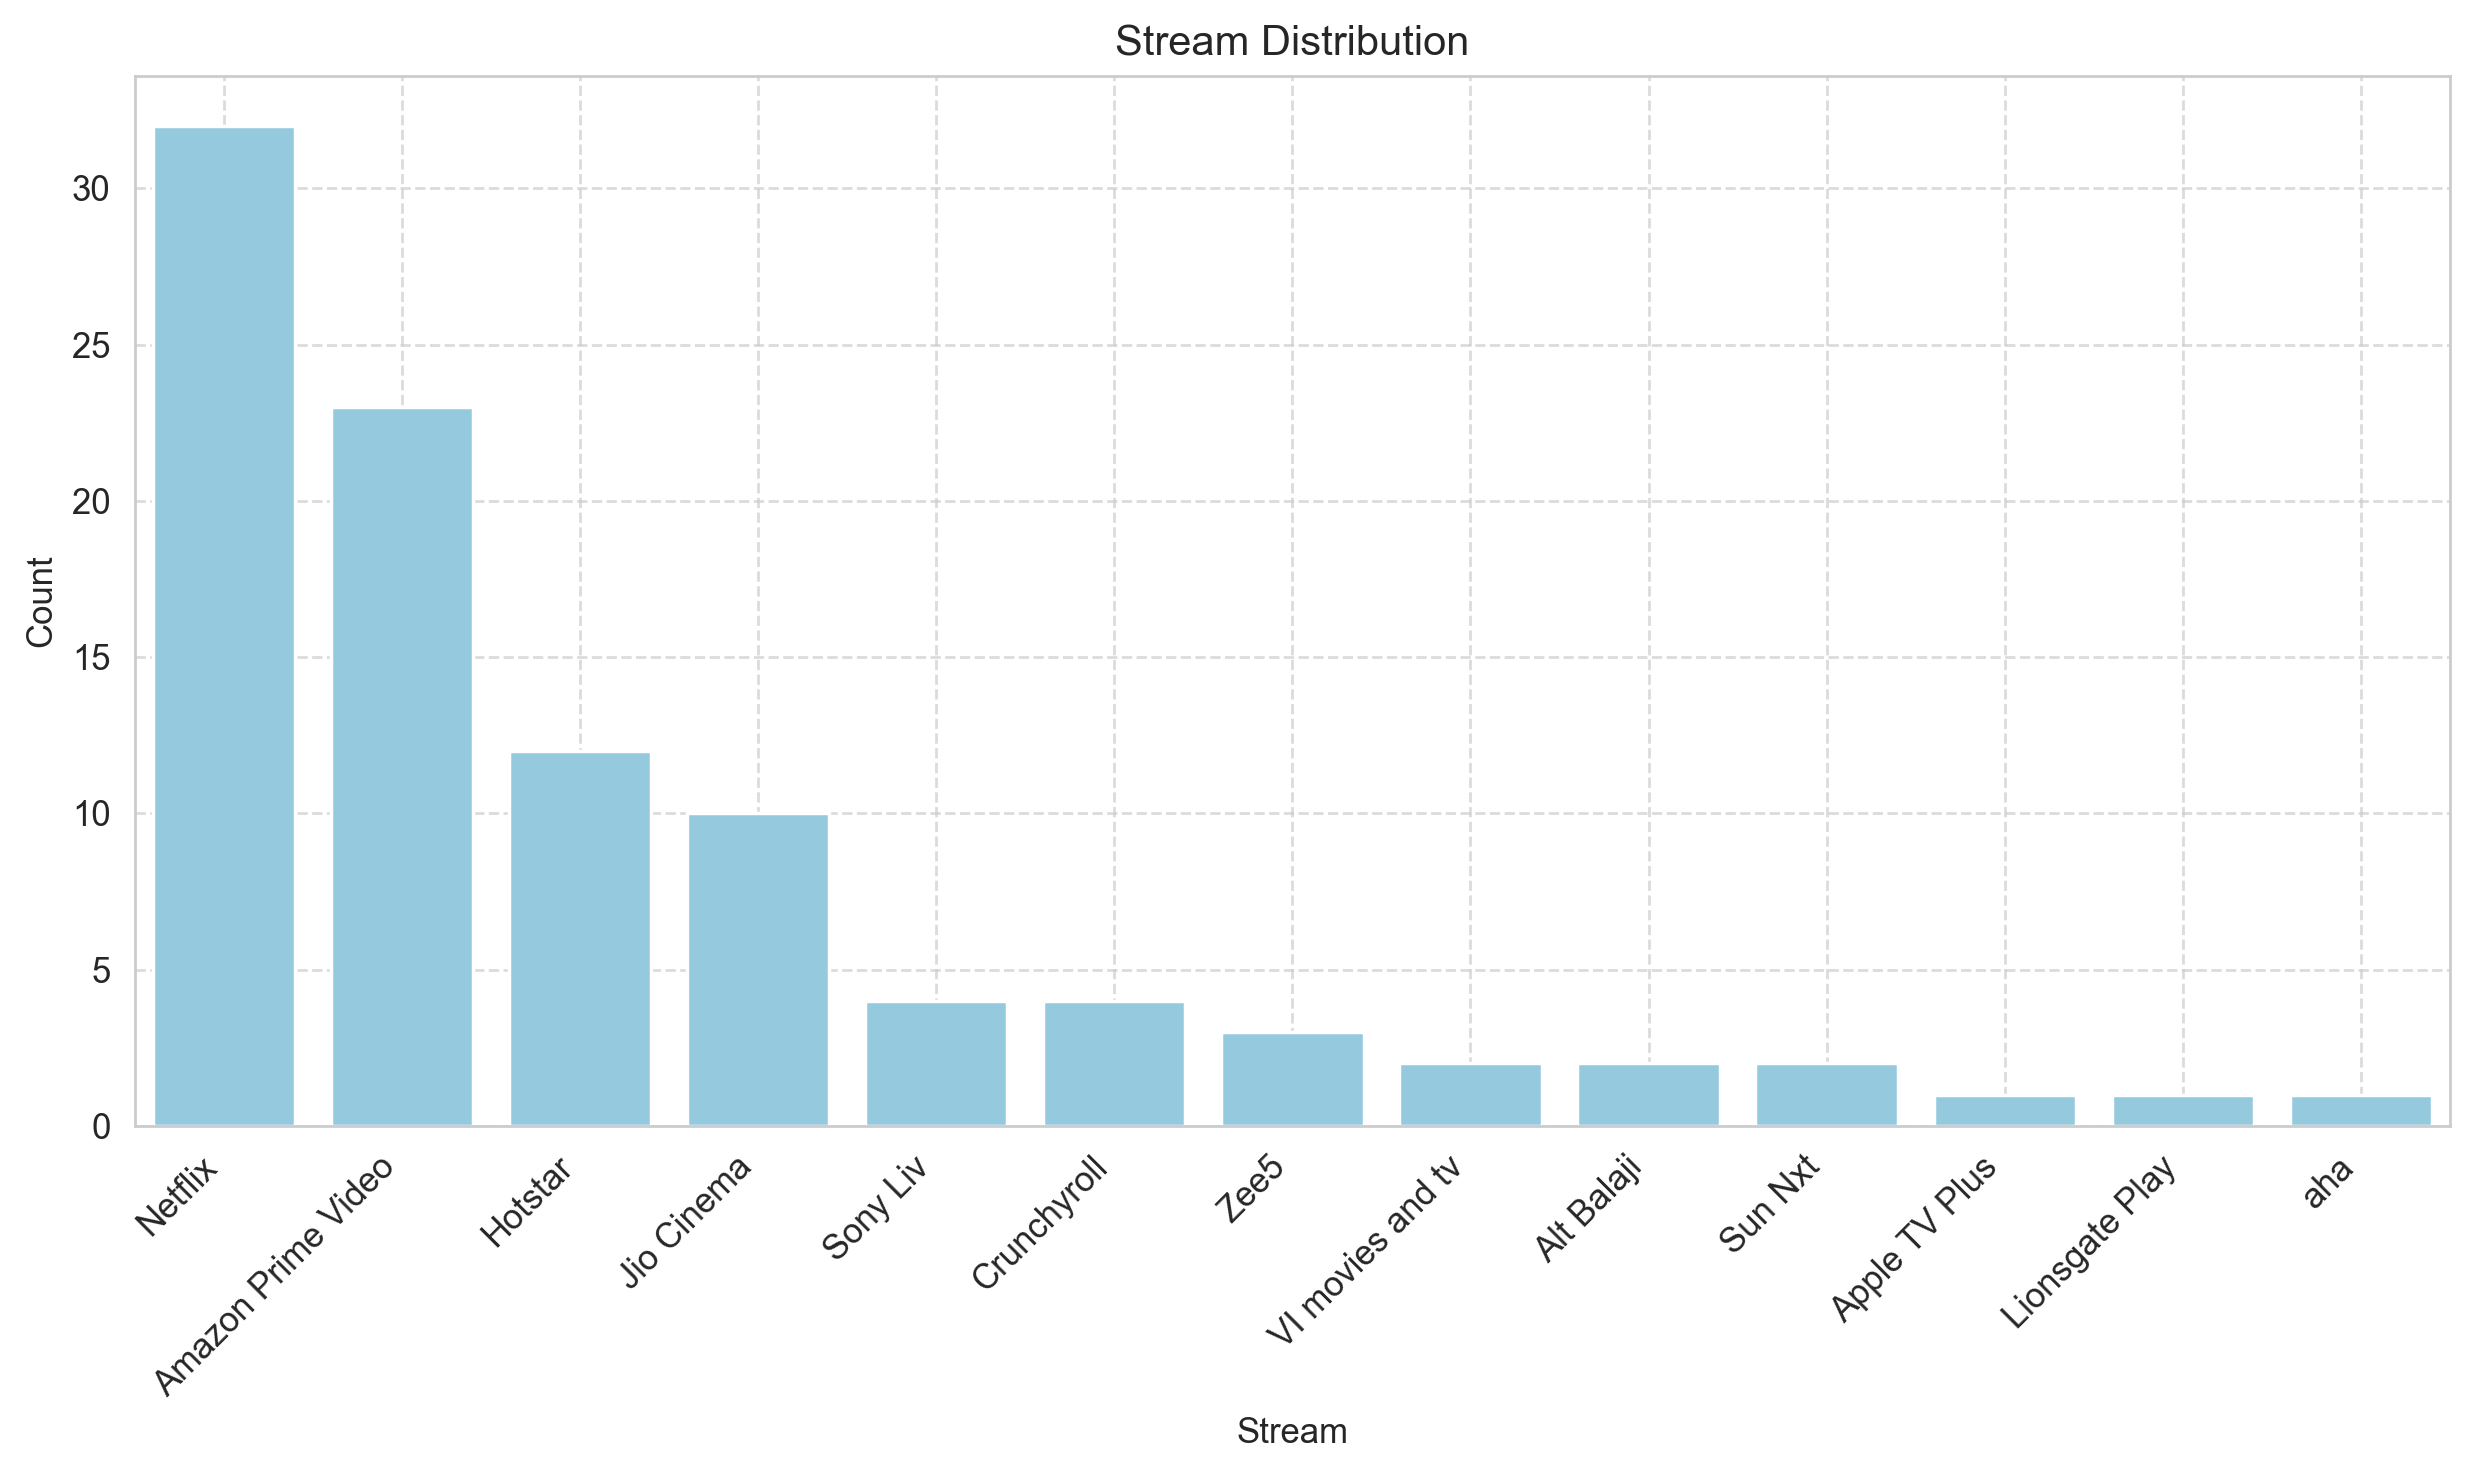

In [194]:
# Create bar plot
plt.figure(figsize=(10, 6), dpi=250)

# Set the style
sns.set_style("whitegrid")

# Plot the barplot
sns.barplot(x='Stream_Service', y='count', data=df_stream, color='skyblue')

# Set labels and title
plt.xlabel('Stream')
plt.ylabel('Count')
plt.title('Stream Distribution')

# Add grid lines only on the y-axis
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()

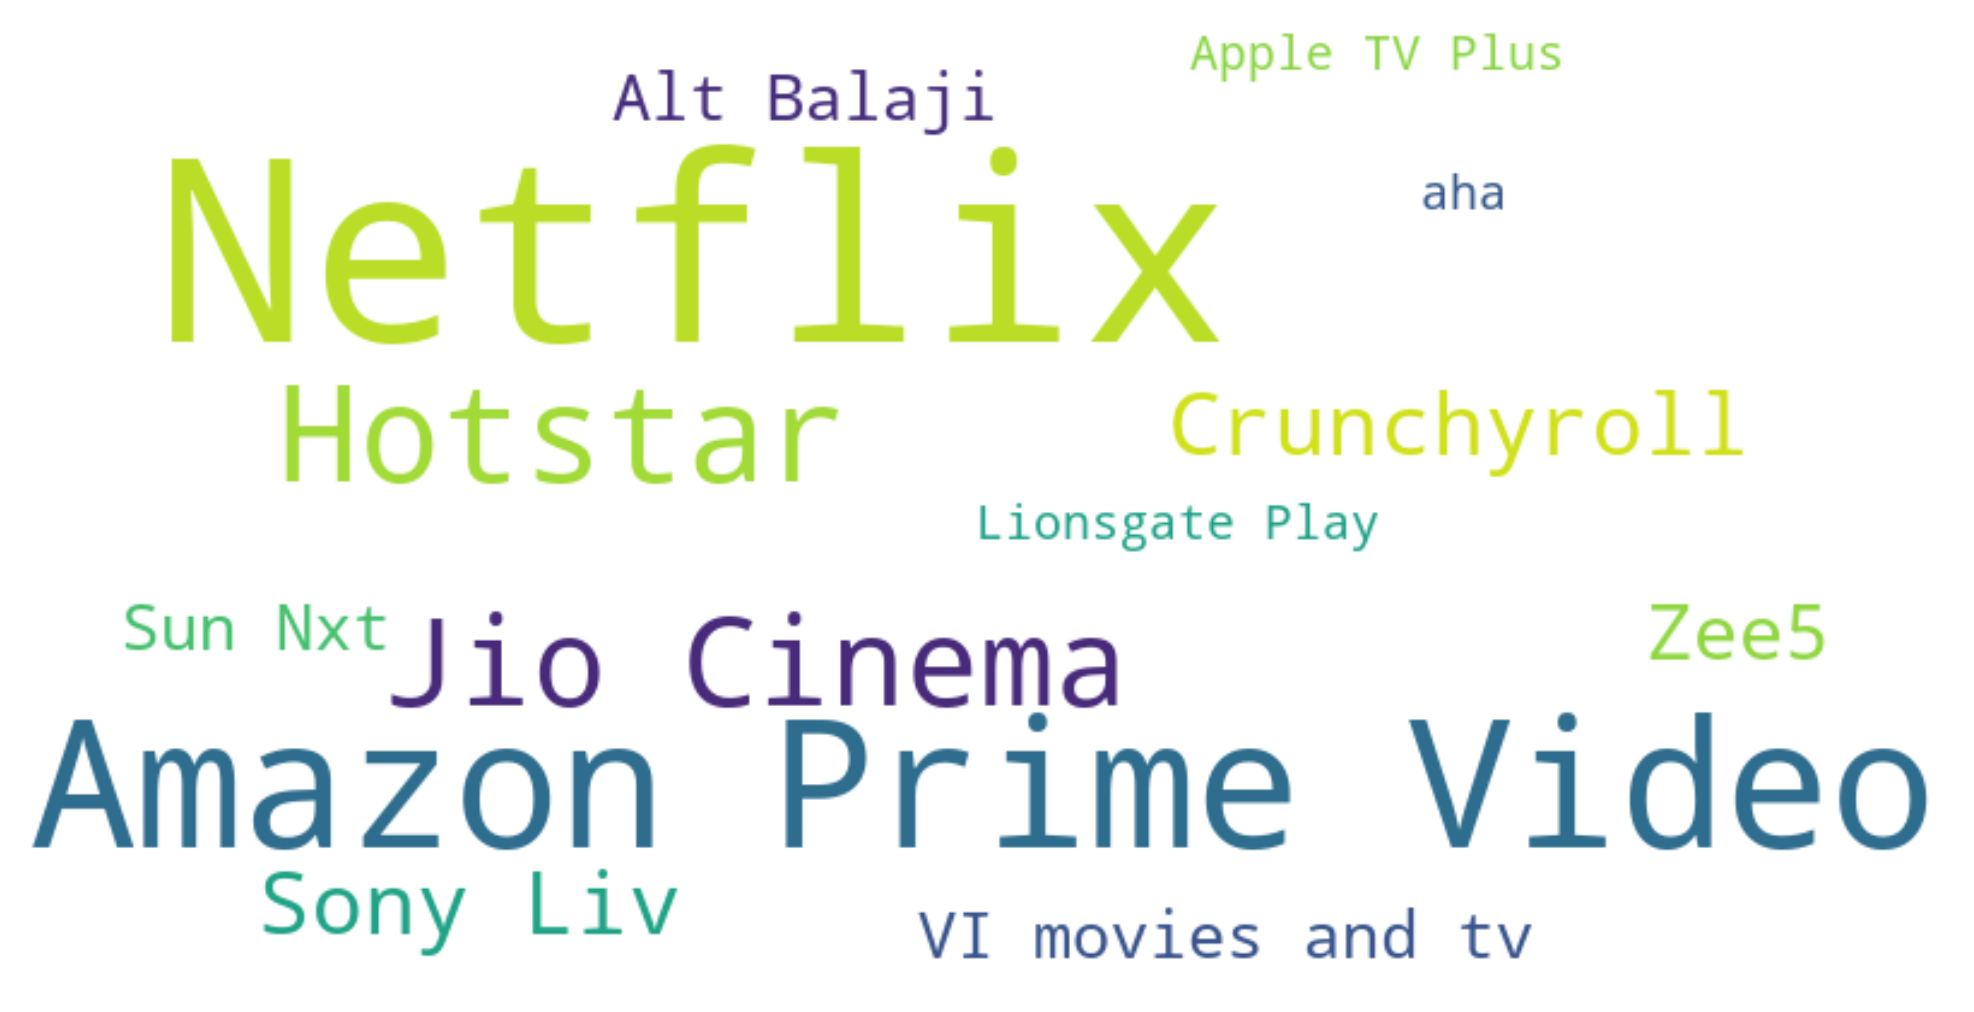

In [195]:
# Generate word cloud from genre frequencies
wordcloud_stream = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(value_stream_service)

# Display the word cloud
plt.figure(figsize=(10, 5), dpi=250)
plt.imshow(wordcloud_stream, interpolation='bilinear')
plt.axis('off')
plt.show()

## AVG Mean Rating for each Streaming service

In [172]:
# Drop rows with missing values in the 'Stream_Service' column
final = final_data.dropna(subset=['Stream_Service'])

In [173]:
# Create a DataFrame for streaming service ratings
stream_rating_df = pd.DataFrame({
    # Extract individual streaming services from the 'Stream_Service' column
    'Stream_Service': [stream for Streams in final['Stream_Service'] for stream in Streams],
     # Repeat IMDb ratings for each streaming service based on the number of occurrences
    'Rating': final['imdb_rating'].repeat(final['Stream_Service'].apply(len))
})

In [197]:
# Group by streaming service and calculate the mean rating
mean_rating = stream_rating_df.groupby('Stream_Service').mean().sort_values('Rating', ascending=False) # Sort the DataFrame based on mean rating in descending order

print(mean_rating)

                      Rating
Stream_Service              
Crunchyroll         8.625000
Sony Liv            8.600000
Jio Cinema          8.140000
Apple TV Plus       7.900000
VI movies and tv    7.700000
Zee5                7.666667
Hotstar             7.641667
Amazon Prime Video  7.369565
Netflix             7.362500
Lionsgate Play      6.400000
aha                 6.400000
Sun Nxt             6.300000
Alt Balaji          5.850000


In [205]:
# Convert the 'mean_rating' dictionary to a DataFrame and reset index
df_mean_rating = pd.DataFrame(mean_rating).reset_index()

df_mean_rating

,Stream_Service,Rating
0,Crunchyroll,8.625000
1,Sony Liv,8.600000
2,Jio Cinema,8.140000
3,Apple TV Plus,7.900000
4,VI movies and tv,7.700000
5,Zee5,7.666667
6,Hotstar,7.641667
7,Amazon Prime Video,7.369565
8,Netflix,7.362500
9,Lionsgate Play,6.400000


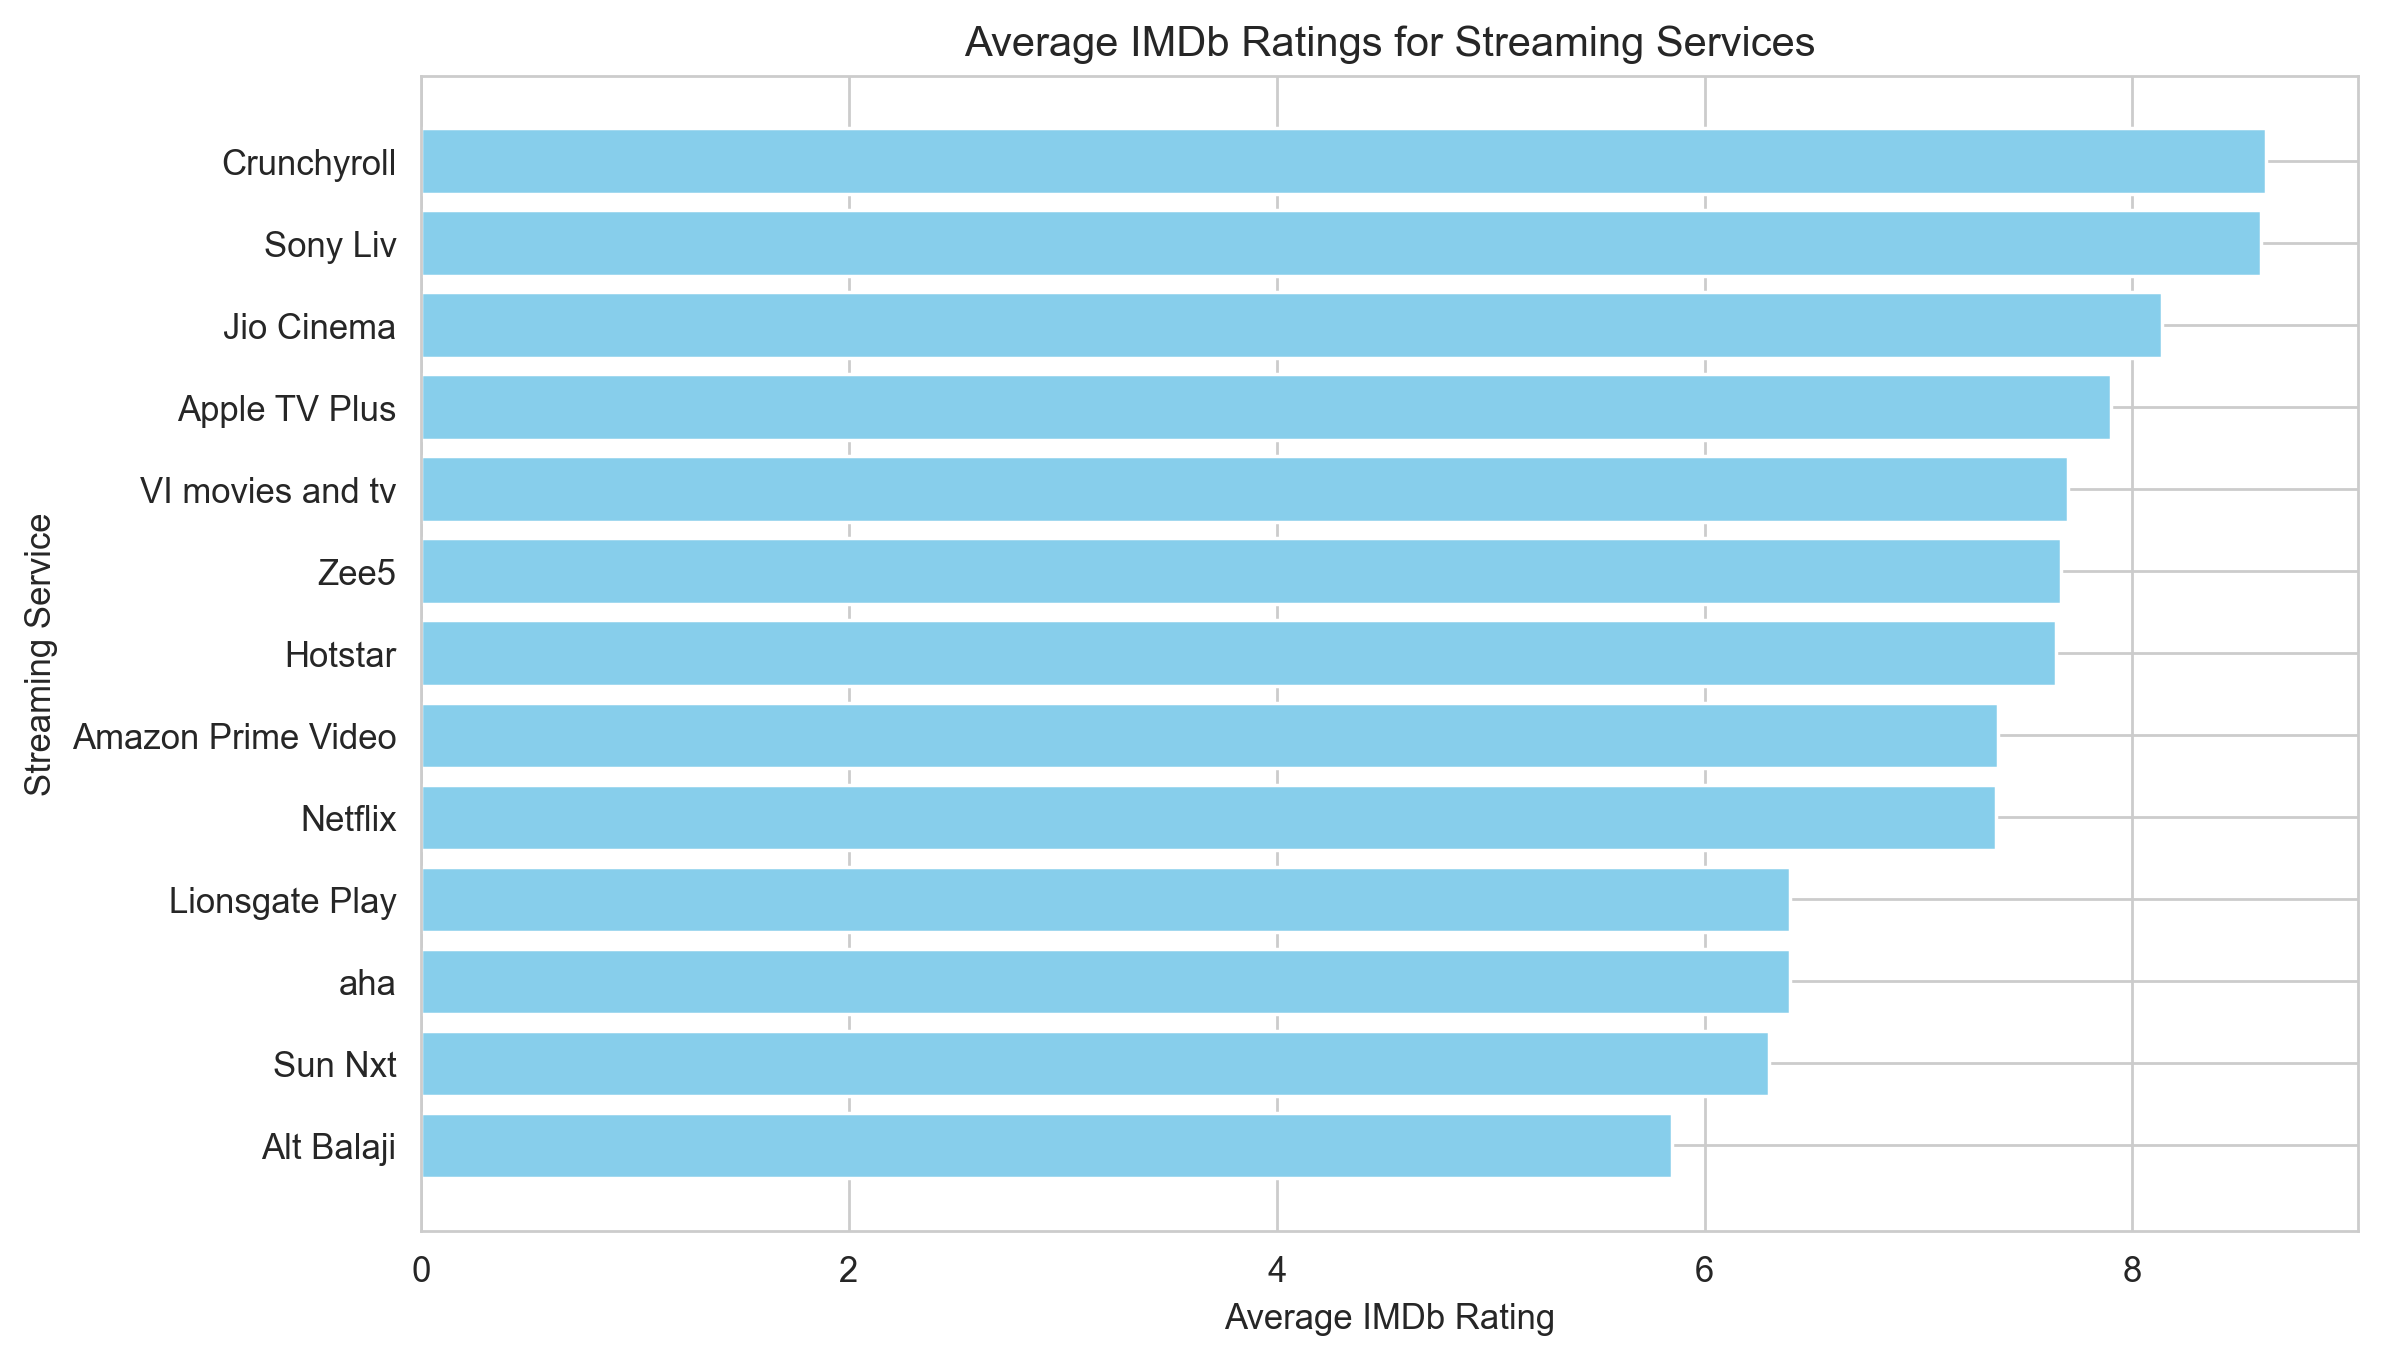

In [204]:
# Plot stream service and imdb rating.
plt.figure(figsize=(10, 6), dpi=250)

# Ploting horizontal bar plot. 
plt.barh('Stream_Service', 'Rating', data=df_mean_rating, color='skyblue')

# Giving Labels.
plt.xlabel('Average IMDb Rating')
plt.ylabel('Streaming Service')
plt.title('Average IMDb Ratings for Streaming Services')
plt.gca().invert_yaxis()  # Invert y-axis to display highest rating at the top
plt.show()

The output shows the average IMDb ratings for content available on various streaming services.

**High Ratings:** Streaming services like **Crunchyroll and Sony Liv** have the highest average ratings, indicating that they offer content that is generally well-received by viewers.

**Moderate Ratings:** Platforms such as **Jio Cinema, Apple TV Plus, and VI movies and tv** also have respectable average ratings, suggesting they provide content with relatively good viewer satisfaction.

**Lower Ratings:** Services like **Alt Balaji, Sun Nxt, and Lionsgate Play** have lower average ratings, indicating that their content might be less popular or receive mixed reviews from viewers.

**Variability:** There's variability in ratings across different streaming services, suggesting differences in content quality and viewer preferences among platforms.

Overall, this analysis provides insights into the perceived quality of content available on different streaming services based on IMDb ratings.

### Analyziing TOP NETFLIX MOVIE and SHOWS

In [280]:
# Selecting movies from the dataset that are available on Netflix and are of type 'Movie',
# then filtering columns to only include 'Title' and 'imdb_rating'.
# Sorting the resulting DataFrame by 'imdb_rating' in descending order and resetting the index.
top_on_netflix_movie = final_data[final_data['Stream_Service'].fillna('').apply(lambda x: 'Netflix' in x) & (final_data['Type'] == 'Movie')][['Title', 'imdb_rating']].sort_values('imdb_rating', ascending=False).reset_index(drop=True)

In [281]:
#Printing top movie on netflix.
print(top_on_netflix_movie)

                    Title  imdb_rating
0                    Dune          8.0
1   Anweshippin Kandethum          7.5
2         Merry Christmas          7.1
3                   Jawan          7.0
4          Murder Mubarak          6.9
5                 Fighter          6.7
6                   Dunki          6.7
7                  Salaar          6.5
8                  Animal          6.2
9                  Damsel          6.1
10         Code 8 Part II          5.7
11          Guntur Kaaram          5.4
12               365 Days          3.3


**Based on the output provided, it can be concluded that "Dune" is the highest-rated movie with an IMDb rating of 8.0, suggesting it has been well-received by viewers. Following "Dune," the ratings gradually decrease, indicating a range of reception among the other listed movies.**

In [283]:
# Selecting movies from the dataset that are available on Netflix and are of type 'Show',
# then filtering columns to only include 'Title' and 'imdb_rating'.
# Sorting the resulting DataFrame by 'imdb_rating' in descending order and resetting the index.
top_on_netflix_show = final_data[final_data['Stream_Service'].fillna('').apply(lambda x: 'Netflix' in x) & (final_data['Type'] == 'Show')][['Title', 'imdb_rating']].sort_values('imdb_rating', ascending=False).reset_index(drop=True)

In [284]:
#Printing top shows on netflix.
print(top_on_netflix_show)

                                       Title  imdb_rating
0                               Breaking Bad          9.5
1                           Naruto Shippūden          8.7
2                                Yellowstone          8.7
3             Demon Slayer: Kimetsu no Yaiba          8.7
4                             Jujutsu Kaisen          8.6
5                                     Naruto          8.4
6                              The Gentlemen          8.3
7                               Young Royals          8.2
8                           Maamla Legal Hai          8.2
9                                Money Heist          8.2
10                                   One Day          8.1
11                                   Lucifer          8.1
12  Turning Point: The Bomb and the Cold War          8.1
13                       The Vampire Diaries          7.7
14                            3 Body Problem          7.7
15                             Young Sheldon          7.6
16            

**Based on the output, it's evident that "Breaking Bad" holds the highest IMDb rating among all listed titles, standing at an impressive 9.5. Additionally, a noteworthy observation is the prominence of animated series within the high-rated titles, such as "Naruto Shippūden," "Demon Slayer: Kimetsu no Yaiba," and "Avatar: The Last Airbender." This prevalence underscores the significant popularity of anime among contemporary audiences, highlighting its widespread appeal and influence in today's entertainment landscape.**

# Exporting Datasets.

In [290]:
# Save the DataFrame 'data_show' to a CSV file named 'JustWatch_Show.csv' without including row indices.

data_show.to_csv('JustWatch_Show', index=False)

In [291]:
# Save the DataFrame 'data_movie' to a CSV file named 'JustWatch_Movie.csv' without including row indices.

data_movie.to_csv('JustWatch_Movie', index=False)

In [292]:
# Save the DataFrame 'final_data' to a CSV file named 'JustWatch.csv' without including row indices.

final_data.to_csv('Justwatch', index=False)